In [246]:
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
import datetime
import time
import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('combined_reddit_dataset.csv')

/Users/temp/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [368]:
TextBlob("UNC Charlotte is a popular school in Charlotte area, most of the students belong to Computer Science. Graduate school is really cool here").noun_phrases

WordList(['unc charlotte', 'popular school', 'charlotte', 'computer', 'graduate school'])

In [35]:
len(df.selftext.notnull())

242576

In [43]:
subset1 = df[~df.selftext.isin([None])]

In [221]:
subset1

Unnamed: 0  index _comments_by_id  _fetched  _flair _info_params  \
0                0      0              {}     False     NaN           {}   
1                1      1              {}     False     NaN           {}   
2                2      2              {}     False     NaN           {}   
3                3      3              {}     False     NaN           {}   
4                4      4              {}     False     NaN           {}   
5                5      5              {}     False     NaN           {}   
6                6      6              {}     False     NaN           {}   
7                7      7              {}     False     NaN           {}   
8                8      8              {}     False     NaN           {}   
9                9      9              {}     False     NaN           {}   
10              10     10              {}     False     NaN           {}   
11              11     11              {}     False     NaN           {}   
12              12     12              {}     False     NaN           {}   
13              13     13              {}     False     NaN           {}   
14              14     14              {}     False     NaN           {}   
15              15     15              {}     False     NaN           {}   
16              16     16              {}     False     NaN           {}   
17              17     17              {}     False     NaN           {}   
18              18     18              {}     False     NaN           {}   
19              19     19              {}     False     NaN           {}   
20              20     20              {}     False     NaN           {}   
21              21     21              {}     False     NaN           {}   
22              22     22              {}     False     NaN           {}   
23              23     23              {}     False     NaN           {}   
24              24     24              {}     False     NaN           {}   
25              25     25              {}     False     NaN           {}   
26              26     26              {}     False     NaN           {}   
27              27     27              {}     False     NaN           {}   
28              28     28              {}     False     NaN           {}   
29              29     29              {}     False     NaN           {}   
...            ...    ...             ...       ...     ...          ...   
242546      242546      7              {}     False     NaN           {}   
242547      242547      8              {}     False     NaN           {}   
242548      242548      9              {}     False     NaN           {}   
242549      242549     10              {}     False     NaN           {}   
242550      242550     11              {}     False     NaN           {}   
242551      242551     12              {}     False     NaN           {}   
242552      242552     13              {}     False     NaN           {}   
242553      242553     14              {}     False     NaN           {}   
242554      242554     15              {}     False     NaN           {}   
242555      242555     16              {}     False     NaN           {}   
242556      242556     17              {}     False     NaN           {}   
242557      242557     18              {}     False     NaN           {}   
242558      242558      0              {}     False     NaN           {}   
242559      242559      1              {}     False     NaN           {}   
242560      242560      2              {}     False     NaN           {}   
242561      242561      3              {}     False     NaN           {}   
242562      242562      4              {}     False     NaN           {}   
242563      242563      5              {}     False     NaN           {}   
242564      242564      6              {}     False     NaN           {}   
242565      242565      7              {}     False     NaN           {}   
242566      242566      8              {}     False     

In [53]:
from datetime import datetime
year = datetime.utcfromtimestamp(1454311568).year
month = datetime.utcfromtimestamp(1454311568).month
day = datetime.utcfromtimestamp(1454311568).day
print(year,'/',month,'/',day)

2016 / 2 / 1


In [92]:
for each in range(len(df.created)):
    print(datetime.utcfromtimestamp(df.created[each]))

2016-02-01 07:26:08
2016-02-01 06:32:51
2016-02-01 06:09:02
2016-02-01 04:56:31
2016-01-31 23:51:49
2016-01-31 17:53:49
2016-01-31 10:20:07
2016-01-31 05:36:10
2016-01-31 02:12:14
2016-01-31 00:15:45
2016-01-30 22:43:07
2016-01-30 22:25:39
2016-01-30 18:45:35
2016-01-30 15:16:07
2016-01-30 12:16:47
2016-01-30 06:55:42
2016-01-30 06:17:20
2016-01-30 05:46:50
2016-01-30 05:37:00
2016-01-30 03:13:03
2016-01-30 01:47:06
2016-01-29 21:34:12
2016-01-29 15:16:08
2016-01-29 11:01:27
2016-01-29 06:52:50
2016-01-29 06:22:05
2016-01-29 03:07:16
2016-01-29 00:13:05
2016-01-28 23:10:54
2016-01-28 23:10:37
2016-01-28 22:37:00
2016-01-28 21:25:46
2016-01-28 18:11:38
2016-01-28 15:16:14
2016-01-28 14:42:20
2016-01-28 11:46:48
2016-01-28 09:33:04
2016-01-28 08:30:01
2016-01-28 08:15:03
2016-01-28 07:34:20
2016-01-28 06:19:11
2016-01-28 04:19:15
2016-01-28 03:10:47
2016-01-28 01:45:06
2016-01-27 22:57:16
2016-01-27 20:26:26
2016-01-27 15:16:07
2016-01-27 11:24:37
2016-01-27 08:19:17
2016-01-27 06:45:06


2016-01-28 15:16:14
2016-01-28 14:42:20
2016-01-28 11:46:48
2016-01-28 09:33:04
2016-01-28 08:30:01
2016-01-28 08:15:03
2016-01-28 07:34:20
2016-01-28 06:19:11
2016-01-28 04:19:15
2016-01-28 03:10:47
2016-01-28 01:45:06
2016-01-27 22:57:16
2016-01-27 20:26:26
2016-01-27 15:16:07
2016-01-27 11:24:37
2016-01-27 08:19:17
2016-01-27 06:45:06
2016-01-27 04:45:56
2016-01-27 03:46:16
2016-01-27 02:41:27
2016-01-27 01:36:32
2016-01-26 23:53:32
2016-01-26 23:28:28
2016-01-26 22:25:24
2016-01-26 20:49:08
2016-01-26 15:16:07
2016-01-26 12:25:17
2016-01-26 10:35:56
2016-01-26 09:28:17
2016-01-26 07:46:06
2016-01-26 06:25:40
2016-01-26 05:59:03
2016-01-26 05:40:19
2016-01-26 03:39:18
2016-01-26 00:03:14
2016-01-25 23:20:32
2016-01-25 21:16:37
2016-01-25 15:16:07
2016-01-25 13:15:59
2016-01-25 13:06:32
2016-01-25 11:02:09
2016-01-25 07:46:21
2016-01-25 06:04:12
2016-01-25 05:59:10
2016-01-25 01:14:37
2016-01-25 01:10:42
2016-01-24 21:44:39
2016-01-24 14:05:01
2016-01-24 13:07:17
2016-01-24 10:07:04


2016-01-30 15:16:07
2016-01-30 12:16:47
2016-01-30 06:55:42
2016-01-30 06:17:20
2016-01-30 05:46:50
2016-01-30 05:37:00
2016-01-30 03:13:03
2016-01-30 01:47:06
2016-01-29 21:34:12
2016-01-29 15:16:08
2016-01-29 11:01:27
2016-01-29 06:52:50
2016-01-29 06:22:05
2016-01-29 03:07:16
2016-01-29 00:13:05
2016-01-28 23:10:54
2016-01-28 23:10:37
2016-01-28 22:37:00
2016-01-28 21:25:46
2016-01-28 18:11:38
2016-01-28 15:16:14
2016-01-28 14:42:20
2016-01-28 11:46:48
2016-01-28 09:33:04
2016-01-28 08:30:01
2016-01-28 08:15:03
2016-01-28 07:34:20
2016-01-28 06:19:11
2016-01-28 04:19:15
2016-01-28 03:10:47
2016-01-28 01:45:06
2016-01-27 22:57:16
2016-01-27 20:26:26
2016-01-27 15:16:07
2016-01-27 11:24:37
2016-01-27 08:19:17
2016-01-27 06:45:06
2016-01-27 04:45:56
2016-01-27 03:46:16
2016-01-27 02:41:27
2016-01-27 01:36:32
2016-01-26 23:53:32
2016-01-26 23:28:28
2016-01-26 22:25:24
2016-01-26 20:49:08
2016-01-26 15:16:07
2016-01-26 12:25:17
2016-01-26 10:35:56
2016-01-26 09:28:17
2016-01-26 07:46:06


2016-01-13 15:16:07
2016-01-13 06:24:20
2016-01-13 03:24:29
2016-01-13 02:16:55
2016-01-13 01:00:55
2016-01-13 00:08:46
2016-01-12 15:16:07
2016-01-12 14:26:07
2016-01-12 13:11:28
2016-01-12 12:41:03
2016-01-12 11:41:09
2016-01-12 08:07:07
2016-01-12 06:39:20
2016-01-12 05:25:37
2016-01-12 05:00:41
2016-01-12 03:14:43
2016-01-12 03:09:55
2016-01-12 01:56:44
2016-01-11 23:25:47
2016-01-11 23:15:24
2016-01-11 23:13:46
2016-01-11 22:50:18
2016-01-11 22:12:30
2016-01-11 17:40:36
2016-01-11 11:29:09
2016-01-11 09:33:32
2016-01-11 09:09:38
2016-01-11 08:58:56
2016-01-11 07:50:14
2016-01-11 05:20:19
2016-01-11 00:32:26
2016-01-11 00:07:53
2016-01-10 14:03:37
2016-01-10 12:12:03
2016-01-10 09:04:24
2016-01-10 04:13:05
2016-01-10 03:40:05
2016-01-10 03:27:51
2016-01-10 00:09:25
2016-01-09 11:36:32
2016-01-09 10:26:26
2016-01-09 08:39:26
2016-01-09 07:52:49
2016-01-09 07:45:47
2016-01-09 06:17:49
2016-01-09 04:11:42
2016-01-09 01:47:44
2016-01-09 01:05:21
2016-01-09 00:22:05
2016-01-08 23:54:43


2016-01-21 05:34:04
2016-01-21 04:32:34
2016-01-20 23:15:33
2016-01-20 20:24:36
2016-01-20 15:16:08
2016-01-20 14:12:46
2016-01-20 14:09:50
2016-01-20 11:47:02
2016-01-20 08:57:33
2016-01-20 04:34:00
2016-01-20 03:54:27
2016-01-20 02:23:30
2016-01-20 01:52:29
2016-01-19 22:44:27
2016-01-19 20:26:05
2016-01-19 15:16:15
2016-01-19 10:32:56
2016-01-19 09:44:17
2016-01-19 09:02:28
2016-01-19 04:57:32
2016-01-19 04:39:49
2016-01-19 01:53:28
2016-01-19 01:06:53
2016-01-19 00:29:50
2016-01-18 22:27:47
2016-01-18 19:44:20
2016-01-18 07:16:28
2016-01-18 06:16:46
2016-01-17 21:37:40
2016-01-17 20:38:24
2016-01-17 10:43:03
2016-01-17 09:35:02
2016-01-17 05:57:41
2016-01-17 03:42:48
2016-01-17 03:31:18
2016-01-16 16:15:25
2016-01-16 15:16:07
2016-01-16 12:10:02
2016-01-16 10:35:17
2016-01-16 05:24:11
2016-01-16 04:31:08
2016-01-16 03:16:40
2016-01-16 03:11:28
2016-01-16 02:42:53
2016-01-16 00:35:46
2016-01-16 00:27:24
2016-01-15 23:17:34
2016-01-15 22:59:18
2016-01-15 22:21:25
2016-01-15 21:06:01


2016-01-19 04:39:49
2016-02-01 07:26:08
2016-02-01 06:32:51
2016-02-01 06:09:02
2016-02-01 04:56:31
2016-01-31 23:51:49
2016-01-31 17:53:49
2016-01-31 10:20:07
2016-01-31 05:36:10
2016-01-31 02:12:14
2016-01-31 00:15:45
2016-01-30 22:43:07
2016-01-30 22:25:39
2016-01-30 18:45:35
2016-01-30 15:16:07
2016-01-30 12:16:47
2016-01-30 06:55:42
2016-01-30 06:17:20
2016-01-30 05:46:50
2016-01-30 05:37:00
2016-01-30 03:13:03
2016-01-30 01:47:06
2016-01-29 21:34:12
2016-01-29 15:16:08
2016-01-29 11:01:27
2016-01-29 06:52:50
2016-01-29 06:22:05
2016-01-29 03:07:16
2016-01-29 00:13:05
2016-01-28 23:10:54
2016-01-28 23:10:37
2016-01-28 22:37:00
2016-01-28 21:25:46
2016-01-28 18:11:38
2016-01-28 15:16:14
2016-01-28 14:42:20
2016-01-28 11:46:48
2016-01-28 09:33:04
2016-01-28 08:30:01
2016-01-28 08:15:03
2016-01-28 07:34:20
2016-01-28 06:19:11
2016-01-28 04:19:15
2016-01-28 03:10:47
2016-01-28 01:45:06
2016-01-27 22:57:16
2016-01-27 20:26:26
2016-01-27 15:16:07
2016-01-27 11:24:37
2016-01-27 08:19:17


2016-02-17 22:46:30
2016-02-17 22:12:33
2016-02-17 15:16:07
2016-02-17 11:59:46
2016-02-17 11:01:29
2016-02-17 06:56:51
2016-02-17 06:28:51
2016-02-17 05:23:02
2016-02-17 05:21:25
2016-02-17 04:59:06
2016-02-17 04:24:23
2016-02-17 04:23:17
2016-02-16 15:16:07
2016-02-16 08:28:31
2016-02-16 08:04:30
2016-02-16 06:15:31
2016-02-16 05:56:34
2016-02-16 02:38:05
2016-02-16 02:06:59
2016-02-16 00:02:33
2016-02-15 23:27:31
2016-02-15 22:42:04
2016-02-15 21:18:57
2016-02-15 07:45:58
2016-02-15 06:03:02
2016-02-15 03:10:37
2016-02-15 01:51:24
2016-02-14 11:48:20
2016-02-14 09:27:47
2016-02-14 08:40:48
2016-02-14 07:48:44
2016-02-14 05:00:33
2016-02-14 02:57:34
2016-02-14 01:34:57
2016-02-14 01:07:11
2016-02-14 00:06:47
2016-02-13 15:16:07
2016-02-13 06:26:54
2016-02-12 23:27:37
2016-02-12 22:56:00
2016-02-12 22:25:00
2016-02-12 22:16:43
2016-02-12 15:16:07
2016-02-12 09:38:18
2016-02-12 09:28:13
2016-02-12 08:01:37
2016-02-12 03:25:12
2016-02-12 02:41:25
2016-02-12 00:31:18
2016-02-11 22:55:57


2016-02-08 13:35:07
2016-02-08 12:43:17
2016-02-08 11:35:57
2016-02-08 11:18:37
2016-02-08 10:33:42
2016-02-08 07:00:09
2016-02-08 06:49:21
2016-02-08 01:23:19
2016-02-08 01:21:49
2016-02-08 00:14:57
2016-02-07 10:14:03
2016-02-07 10:05:16
2016-02-07 07:52:20
2016-02-07 07:49:12
2016-02-07 03:27:35
2016-02-07 01:56:28
2016-02-06 23:16:33
2016-02-06 15:16:07
2016-02-06 10:58:38
2016-02-06 10:46:31
2016-02-06 10:02:53
2016-02-06 09:58:45
2016-02-06 08:03:41
2016-02-06 06:46:50
2016-02-06 05:54:28
2016-02-06 04:11:21
2016-02-06 04:05:20
2016-02-06 03:42:15
2016-02-06 03:13:56
2016-02-05 15:16:07
2016-02-05 13:30:27
2016-02-05 12:41:47
2016-02-05 12:41:42
2016-02-05 12:29:25
2016-02-05 08:50:57
2016-02-05 05:30:33
2016-02-05 04:40:20
2016-02-05 04:27:45
2016-02-05 03:10:35
2016-02-05 03:03:25
2016-02-05 02:34:50
2016-02-05 00:56:08
2016-02-04 22:25:16
2016-02-04 22:03:49
2016-02-04 14:32:45
2016-02-04 12:44:34
2016-02-04 10:27:05
2016-03-01 11:40:01
2016-03-01 10:09:53
2016-03-01 04:34:25


2016-02-18 21:27:12
2016-02-18 20:58:15
2016-02-18 15:16:07
2016-02-18 12:19:56
2016-02-18 10:29:24
2016-02-18 09:41:42
2016-02-18 09:38:29
2016-02-18 06:17:25
2016-02-18 04:04:11
2016-02-18 02:06:11
2016-02-17 23:58:42
2016-02-17 23:28:18
2016-02-17 23:04:42
2016-02-17 22:46:30
2016-02-17 22:12:33
2016-02-17 15:16:07
2016-02-17 11:59:46
2016-02-17 11:01:29
2016-02-17 06:56:51
2016-02-17 06:28:51
2016-02-17 05:23:02
2016-02-17 05:21:25
2016-02-17 04:59:06
2016-02-17 04:24:23
2016-02-17 04:23:17
2016-02-16 15:16:07
2016-02-16 08:28:31
2016-02-16 08:04:30
2016-02-16 06:15:31
2016-02-16 05:56:34
2016-02-16 02:38:05
2016-02-16 02:06:59
2016-02-16 00:02:33
2016-02-15 23:27:31
2016-02-15 22:42:04
2016-02-15 21:18:57
2016-02-15 07:45:58
2016-02-15 06:03:02
2016-02-15 03:10:37
2016-02-15 01:51:24
2016-02-14 11:48:20
2016-02-14 09:27:47
2016-02-14 08:40:48
2016-02-14 07:48:44
2016-02-14 05:00:33
2016-02-14 02:57:34
2016-02-14 01:34:57
2016-02-14 01:07:11
2016-02-14 00:06:47
2016-02-13 15:16:07


2016-02-17 11:59:46
2016-02-17 11:01:29
2016-02-17 06:56:51
2016-02-17 06:28:51
2016-02-17 05:23:02
2016-02-17 05:21:25
2016-02-17 04:59:06
2016-02-17 04:24:23
2016-02-17 04:23:17
2016-02-16 15:16:07
2016-02-16 08:28:31
2016-02-16 08:04:30
2016-02-16 06:15:31
2016-02-16 05:56:34
2016-02-16 02:38:05
2016-02-16 02:06:59
2016-02-16 00:02:33
2016-02-15 23:27:31
2016-02-15 22:42:04
2016-02-15 21:18:57
2016-02-15 07:45:58
2016-02-15 06:03:02
2016-02-15 03:10:37
2016-02-15 01:51:24
2016-02-14 11:48:20
2016-02-14 09:27:47
2016-02-14 08:40:48
2016-02-14 07:48:44
2016-02-14 05:00:33
2016-02-14 02:57:34
2016-02-14 01:34:57
2016-02-14 01:07:11
2016-02-14 00:06:47
2016-03-01 11:40:01
2016-03-01 10:09:53
2016-03-01 04:34:25
2016-03-01 04:29:51
2016-03-01 04:29:26
2016-03-01 00:07:29
2016-02-29 23:55:57
2016-02-29 23:26:38
2016-02-29 22:18:22
2016-02-29 11:30:53
2016-02-29 10:17:37
2016-02-29 10:07:46
2016-02-29 10:05:31
2016-02-29 08:35:34
2016-02-29 08:17:20
2016-02-29 07:00:17
2016-02-29 04:40:53


2016-02-25 12:31:42
2016-02-25 10:35:20
2016-02-25 10:12:13
2016-02-25 09:35:35
2016-02-25 09:25:07
2016-02-25 08:05:33
2016-02-25 08:04:11
2016-02-25 07:16:36
2016-02-25 03:38:46
2016-02-25 02:30:21
2016-02-25 00:38:30
2016-02-25 00:35:50
2016-02-24 23:56:37
2016-02-24 21:52:35
2016-02-24 15:16:07
2016-02-24 10:24:07
2016-02-24 09:40:23
2016-02-24 08:24:27
2016-02-24 08:09:53
2016-02-24 05:52:35
2016-02-24 03:55:42
2016-02-24 03:24:33
2016-02-24 01:32:50
2016-02-23 15:16:08
2016-02-23 11:25:43
2016-02-23 09:16:08
2016-02-23 06:55:50
2016-02-23 06:53:53
2016-02-23 06:27:00
2016-02-23 05:28:26
2016-02-23 04:17:51
2016-02-23 00:48:00
2016-02-23 00:47:02
2016-02-22 23:49:41
2016-02-22 23:10:49
2016-02-22 16:49:49
2016-02-22 12:47:02
2016-02-22 06:06:26
2016-02-22 05:44:47
2016-02-22 02:44:51
2016-02-21 22:43:28
2016-02-21 08:27:13
2016-02-21 04:06:03
2016-02-20 23:52:25
2016-03-01 11:40:01
2016-03-01 10:09:53
2016-03-01 04:34:25
2016-03-01 04:29:51
2016-03-01 04:29:26
2016-03-01 00:07:29


2016-03-08 23:30:23
2016-03-08 21:20:00
2016-03-08 21:07:39
2016-03-08 15:16:06
2016-03-08 08:37:28
2016-03-08 08:20:00
2016-03-08 05:29:29
2016-03-08 05:09:54
2016-03-08 04:41:58
2016-03-08 04:35:16
2016-03-08 04:11:46
2016-03-08 02:41:07
2016-03-08 00:44:11
2016-03-07 23:27:37
2016-03-07 23:05:51
2016-03-07 22:45:23
2016-03-07 21:45:13
2016-03-07 15:16:06
2016-03-07 13:29:13
2016-03-07 10:09:44
2016-03-07 09:34:57
2016-03-07 08:27:08
2016-03-07 06:49:07
2016-03-07 03:00:19
2016-03-07 02:46:37
2016-03-07 02:36:16
2016-03-07 00:55:51
2016-03-06 12:58:55
2016-03-06 11:38:43
2016-03-06 07:56:16
2016-03-06 06:11:21
2016-03-05 22:20:12
2016-03-05 15:16:06
2016-03-05 12:42:55
2016-03-05 12:41:38
2016-03-05 09:31:52
2016-03-05 07:56:18
2016-03-05 05:07:17
2016-03-05 04:39:45
2016-03-04 22:55:17
2016-03-04 21:40:28
2016-03-04 15:16:05
2016-03-04 12:55:08
2016-03-04 10:47:30
2016-03-04 06:29:41
2016-03-04 03:17:51
2016-03-04 02:46:43
2016-03-04 01:11:19
2016-03-04 01:10:28
2016-03-03 23:54:25


2016-03-07 15:16:06
2016-03-07 13:29:13
2016-03-07 10:09:44
2016-03-07 09:34:57
2016-03-07 08:27:08
2016-03-07 06:49:07
2016-03-07 03:00:19
2016-03-07 02:46:37
2016-03-07 02:36:16
2016-03-07 00:55:51
2016-03-06 12:58:55
2016-03-06 11:38:43
2016-03-06 07:56:16
2016-03-06 06:11:21
2016-03-05 22:20:12
2016-03-05 15:16:06
2016-03-05 12:42:55
2016-03-05 12:41:38
2016-03-05 09:31:52
2016-03-05 07:56:18
2016-04-01 09:38:19
2016-04-01 09:27:47
2016-04-01 05:38:40
2016-04-01 04:54:12
2016-04-01 04:45:37
2016-04-01 03:49:33
2016-04-01 03:02:22
2016-04-01 01:49:11
2016-04-01 00:03:09
2016-03-31 22:41:36
2016-03-31 22:19:08
2016-03-31 21:57:40
2016-03-31 19:54:03
2016-03-31 19:37:15
2016-03-31 15:16:05
2016-03-31 10:23:25
2016-03-31 06:29:50
2016-03-31 05:19:15
2016-03-31 05:12:49
2016-03-31 05:03:01
2016-03-31 04:57:00
2016-03-31 03:53:02
2016-03-31 03:30:22
2016-03-31 01:55:25
2016-03-31 01:46:24
2016-03-31 01:29:25
2016-03-31 01:21:42
2016-03-30 21:12:48
2016-03-30 20:32:33
2016-03-30 15:16:06


2016-03-28 21:11:51
2016-03-28 20:16:57
2016-03-28 09:28:43
2016-03-28 06:14:44
2016-03-28 05:54:59
2016-03-28 04:23:27
2016-03-28 00:48:48
2016-03-28 00:00:19
2016-03-27 22:09:36
2016-03-27 20:03:54
2016-03-27 14:45:43
2016-03-27 13:58:57
2016-03-27 11:50:59
2016-03-27 10:45:01
2016-03-27 10:25:38
2016-03-27 10:05:27
2016-03-27 06:55:00
2016-03-27 00:42:39
2016-03-26 23:40:07
2016-03-26 20:04:11
2016-03-26 15:16:06
2016-03-26 09:42:26
2016-03-26 09:16:55
2016-03-26 07:41:29
2016-03-26 06:47:15
2016-03-26 03:56:08
2016-03-26 03:50:54
2016-03-26 03:34:39
2016-03-26 00:34:47
2016-03-25 20:11:22
2016-03-25 15:16:06
2016-03-25 14:24:42
2016-03-25 07:32:57
2016-03-25 05:28:20
2016-03-25 05:25:32
2016-03-25 02:10:45
2016-03-25 01:32:20
2016-03-25 00:28:10
2016-03-24 23:27:39
2016-03-24 23:10:13
2016-03-24 22:50:57
2016-03-24 22:31:21
2016-03-24 22:16:32
2016-03-24 19:54:43
2016-03-24 17:44:52
2016-03-24 15:16:05
2016-03-24 11:23:24
2016-03-24 09:07:57
2016-03-24 09:04:05
2016-03-24 07:45:27


2016-03-24 09:04:05
2016-03-24 07:45:27
2016-03-24 06:09:05
2016-03-24 02:39:53
2016-03-24 00:03:50
2016-03-23 21:15:20
2016-03-23 20:38:32
2016-03-23 17:25:50
2016-03-23 15:16:07
2016-03-23 12:57:46
2016-03-23 11:13:37
2016-03-23 06:40:41
2016-03-23 02:04:11
2016-03-23 00:56:38
2016-03-22 15:16:06
2016-03-22 10:24:30
2016-03-22 09:39:16
2016-03-22 09:24:25
2016-03-22 08:58:38
2016-03-22 07:26:35
2016-03-22 07:22:25
2016-03-22 03:13:47
2016-03-21 21:49:31
2016-03-21 20:01:02
2016-03-21 12:58:12
2016-03-21 03:52:27
2016-03-21 03:15:04
2016-03-21 01:10:21
2016-03-20 10:06:01
2016-03-20 07:29:40
2016-03-20 07:20:42
2016-03-20 00:11:42
2016-03-19 22:06:32
2016-03-19 19:32:53
2016-03-19 15:16:06
2016-03-19 11:18:23
2016-03-19 10:44:37
2016-03-19 10:29:16
2016-03-19 10:18:59
2016-03-19 07:54:15
2016-03-19 04:36:44
2016-03-19 01:23:22
2016-03-19 00:40:22
2016-03-19 00:21:43
2016-03-19 00:10:38
2016-03-18 23:20:40
2016-03-18 22:29:34
2016-03-18 21:11:30
2016-03-18 15:16:06
2016-03-18 09:21:32


2016-03-30 06:06:08
2016-03-30 05:58:36
2016-03-30 05:19:31
2016-03-30 03:55:51
2016-03-30 03:53:47
2016-03-30 03:40:43
2016-03-30 02:44:17
2016-03-30 02:12:40
2016-03-30 01:41:25
2016-03-30 01:17:36
2016-03-29 22:53:14
2016-03-29 22:36:00
2016-03-29 22:21:54
2016-03-29 22:06:28
2016-03-29 21:31:11
2016-03-29 21:09:09
2016-03-29 21:00:23
2016-03-29 20:50:58
2016-03-29 15:16:06
2016-03-29 05:46:01
2016-03-29 02:05:48
2016-03-29 01:26:36
2016-03-29 00:41:44
2016-03-29 00:24:16
2016-03-29 00:07:50
2016-03-28 21:11:51
2016-03-28 20:16:57
2016-03-28 09:28:43
2016-03-28 06:14:44
2016-03-28 05:54:59
2016-03-28 04:23:27
2016-03-28 00:48:48
2016-03-28 00:00:19
2016-03-27 22:09:36
2016-03-27 20:03:54
2016-03-27 14:45:43
2016-03-27 13:58:57
2016-03-27 11:50:59
2016-03-27 10:45:01
2016-03-27 10:25:38
2016-03-27 10:05:27
2016-03-27 06:55:00
2016-03-27 00:42:39
2016-03-26 23:40:07
2016-03-26 20:04:11
2016-03-26 15:16:06
2016-03-26 09:42:26
2016-03-26 09:16:55
2016-03-26 07:41:29
2016-03-26 06:47:15


2016-03-24 22:16:32
2016-03-24 19:54:43
2016-03-24 17:44:52
2016-03-24 15:16:05
2016-03-24 11:23:24
2016-03-24 09:07:57
2016-03-24 09:04:05
2016-03-24 07:45:27
2016-03-24 06:09:05
2016-03-24 02:39:53
2016-03-24 00:03:50
2016-03-23 21:15:20
2016-03-23 20:38:32
2016-03-23 17:25:50
2016-03-23 15:16:07
2016-03-23 12:57:46
2016-03-23 11:13:37
2016-04-01 09:38:19
2016-04-01 09:27:47
2016-04-01 05:38:40
2016-04-01 04:54:12
2016-04-01 04:45:37
2016-04-01 03:49:33
2016-04-01 03:02:22
2016-04-01 01:49:11
2016-04-01 00:03:09
2016-03-31 22:41:36
2016-03-31 22:19:08
2016-03-31 21:57:40
2016-03-31 19:54:03
2016-03-31 19:37:15
2016-03-31 15:16:05
2016-03-31 10:23:25
2016-03-31 06:29:50
2016-03-31 05:19:15
2016-03-31 05:12:49
2016-03-31 05:03:01
2016-03-31 04:57:00
2016-03-31 03:53:02
2016-03-31 03:30:22
2016-03-31 01:55:25
2016-03-31 01:46:24
2016-03-31 01:29:25
2016-03-31 01:21:42
2016-03-30 21:12:48
2016-03-30 20:32:33
2016-03-30 15:16:06
2016-03-30 10:31:45
2016-03-30 08:23:21
2016-03-30 07:27:38


2016-04-07 05:33:48
2016-04-07 00:19:24
2016-04-06 22:42:36
2016-04-06 21:33:59
2016-04-06 21:26:15
2016-04-06 20:53:51
2016-04-06 15:16:06
2016-04-06 11:36:06
2016-04-06 09:34:02
2016-04-06 07:25:22
2016-04-06 04:11:13
2016-04-06 01:37:13
2016-04-06 00:13:50
2016-04-05 22:19:39
2016-04-05 22:12:32
2016-04-05 15:16:06
2016-04-05 08:59:46
2016-04-05 02:58:05
2016-04-05 02:54:14
2016-04-04 23:10:46
2016-04-04 21:43:12
2016-04-04 21:07:23
2016-04-04 19:27:06
2016-04-04 08:47:21
2016-04-04 08:23:44
2016-04-04 06:53:28
2016-04-04 06:01:20
2016-04-04 01:28:17
2016-04-03 13:09:28
2016-04-03 10:21:34
2016-04-03 09:19:26
2016-04-03 08:54:35
2016-04-03 06:57:44
2016-04-03 05:06:02
2016-04-02 15:29:47
2016-04-02 15:16:06
2016-04-02 10:51:13
2016-04-02 10:28:32
2016-04-02 03:09:37
2016-05-01 07:56:15
2016-05-01 06:15:43
2016-05-01 06:07:03
2016-05-01 05:05:08
2016-05-01 04:14:16
2016-05-01 00:35:22
2016-04-30 23:11:17
2016-04-30 20:07:14
2016-04-30 15:16:05
2016-04-30 13:48:55
2016-04-30 09:43:32


2016-04-16 11:46:03
2016-04-16 10:07:32
2016-04-16 06:41:49
2016-04-16 04:47:09
2016-04-16 03:03:19
2016-04-16 01:53:28
2016-04-16 00:54:57
2016-04-15 22:54:00
2016-04-15 20:35:22
2016-04-15 15:16:06
2016-04-15 13:19:23
2016-04-15 05:23:35
2016-04-15 03:10:43
2016-04-15 00:58:27
2016-04-15 00:41:08
2016-04-14 23:55:23
2016-04-14 23:52:01
2016-04-14 23:15:36
2016-04-14 22:54:59
2016-04-14 19:18:07
2016-04-14 15:16:05
2016-04-14 13:25:44
2016-04-14 11:44:03
2016-04-14 08:46:25
2016-04-14 07:37:01
2016-04-14 04:44:00
2016-04-14 03:59:28
2016-04-14 03:41:12
2016-04-14 03:27:27
2016-04-14 03:23:29
2016-04-14 03:16:26
2016-04-14 01:55:31
2016-04-14 01:41:16
2016-04-13 22:34:45
2016-04-13 21:25:41
2016-04-13 20:21:43
2016-04-13 19:43:35
2016-04-13 18:51:41
2016-04-13 15:16:07
2016-04-13 12:34:33
2016-04-13 11:19:16
2016-04-13 10:43:46
2016-04-13 10:19:07
2016-04-13 08:05:00
2016-04-13 07:00:08
2016-04-13 05:50:16
2016-04-13 03:26:56
2016-04-13 02:45:30
2016-04-13 02:44:05
2016-04-13 01:59:54


2016-04-14 13:25:44
2016-04-14 11:44:03
2016-04-14 08:46:25
2016-04-14 07:37:01
2016-04-14 04:44:00
2016-04-14 03:59:28
2016-04-14 03:41:12
2016-04-14 03:27:27
2016-04-14 03:23:29
2016-04-14 03:16:26
2016-04-14 01:55:31
2016-04-14 01:41:16
2016-04-13 22:34:45
2016-04-13 21:25:41
2016-04-13 20:21:43
2016-04-13 19:43:35
2016-04-13 18:51:41
2016-04-13 15:16:07
2016-04-13 12:34:33
2016-04-13 11:19:16
2016-04-13 10:43:46
2016-04-13 10:19:07
2016-04-13 08:05:00
2016-04-13 07:00:08
2016-04-13 05:50:16
2016-04-13 03:26:56
2016-04-13 02:45:30
2016-04-13 02:44:05
2016-04-13 01:59:54
2016-04-12 23:33:40
2016-04-12 23:14:49
2016-04-12 23:07:01
2016-04-12 21:26:54
2016-04-12 21:24:00
2016-04-12 20:24:22
2016-04-12 15:16:06
2016-04-12 10:46:40
2016-04-12 05:40:40
2016-04-12 03:58:54
2016-04-12 03:12:51
2016-04-11 23:09:36
2016-04-11 21:14:46
2016-04-11 09:53:50
2016-04-11 06:18:50
2016-04-11 03:00:36
2016-04-11 00:23:29
2016-04-10 22:28:16
2016-04-10 20:40:04
2016-04-10 13:06:35
2016-04-10 08:37:26


2016-04-15 20:35:22
2016-04-15 15:16:06
2016-04-15 13:19:23
2016-04-15 05:23:35
2016-04-15 03:10:43
2016-04-15 00:58:27
2016-04-15 00:41:08
2016-04-14 23:55:23
2016-04-14 23:52:01
2016-04-14 23:15:36
2016-04-14 22:54:59
2016-04-14 19:18:07
2016-04-14 15:16:05
2016-04-14 13:25:44
2016-04-14 11:44:03
2016-04-14 08:46:25
2016-04-14 07:37:01
2016-04-14 04:44:00
2016-04-14 03:59:28
2016-04-14 03:41:12
2016-04-14 03:27:27
2016-04-14 03:23:29
2016-04-14 03:16:26
2016-04-14 01:55:31
2016-04-14 01:41:16
2016-04-13 22:34:45
2016-04-13 21:25:41
2016-04-13 20:21:43
2016-04-13 19:43:35
2016-04-13 18:51:41
2016-04-13 15:16:07
2016-04-13 12:34:33
2016-04-13 11:19:16
2016-04-13 10:43:46
2016-04-13 10:19:07
2016-04-13 08:05:00
2016-04-13 07:00:08
2016-04-13 05:50:16
2016-04-13 03:26:56
2016-04-13 02:45:30
2016-04-13 02:44:05
2016-04-13 01:59:54
2016-04-12 23:33:40
2016-04-12 23:14:49
2016-04-12 23:07:01
2016-04-12 21:26:54
2016-04-12 21:24:00
2016-04-12 20:24:22
2016-04-12 15:16:06
2016-04-12 10:46:40


2016-04-16 12:27:14
2016-04-16 11:46:03
2016-04-16 10:07:32
2016-04-16 06:41:49
2016-04-16 04:47:09
2016-04-16 03:03:19
2016-04-16 01:53:28
2016-04-16 00:54:57
2016-04-15 22:54:00
2016-05-01 07:56:15
2016-05-01 06:15:43
2016-05-01 06:07:03
2016-05-01 05:05:08
2016-05-01 04:14:16
2016-05-01 00:35:22
2016-04-30 23:11:17
2016-04-30 20:07:14
2016-04-30 15:16:05
2016-04-30 13:48:55
2016-04-30 09:43:32
2016-04-30 08:38:21
2016-04-30 07:09:18
2016-04-30 05:40:39
2016-04-30 02:12:42
2016-04-30 01:13:25
2016-04-29 23:54:11
2016-04-29 23:09:24
2016-04-29 22:47:47
2016-04-29 22:00:32
2016-04-29 21:53:14
2016-04-29 21:29:16
2016-04-29 15:16:06
2016-04-29 13:50:26
2016-04-29 09:17:40
2016-04-29 04:31:22
2016-04-29 03:47:34
2016-04-29 00:11:37
2016-04-28 23:54:34
2016-04-28 23:08:52
2016-04-28 22:50:07
2016-04-28 22:40:35
2016-04-28 22:40:13
2016-04-28 15:16:06
2016-04-28 09:02:27
2016-04-28 07:50:23
2016-04-28 07:49:36
2016-04-28 04:41:05
2016-04-28 02:48:33
2016-04-28 00:19:55
2016-04-27 23:16:45


2016-04-28 22:40:35
2016-04-28 22:40:13
2016-04-28 15:16:06
2016-04-28 09:02:27
2016-04-28 07:50:23
2016-04-28 07:49:36
2016-04-28 04:41:05
2016-04-28 02:48:33
2016-04-28 00:19:55
2016-04-27 23:16:45
2016-04-27 23:12:21
2016-04-27 22:08:13
2016-04-27 22:07:51
2016-04-27 22:05:29
2016-04-27 21:47:00
2016-04-27 21:11:32
2016-04-27 20:35:35
2016-04-27 19:21:26
2016-04-27 15:16:06
2016-04-27 13:51:37
2016-04-27 11:35:13
2016-04-27 10:50:28
2016-04-27 08:58:02
2016-04-27 08:43:12
2016-04-27 08:17:18
2016-04-27 07:36:29
2016-04-27 05:57:10
2016-04-27 05:34:31
2016-04-27 05:33:44
2016-04-27 04:42:00
2016-04-27 04:30:14
2016-04-27 03:41:48
2016-04-27 01:12:16
2016-04-27 00:48:51
2016-04-27 00:14:05
2016-04-26 21:29:58
2016-04-26 21:11:29
2016-04-26 20:37:36
2016-04-26 15:16:07
2016-04-26 12:54:27
2016-04-26 11:03:30
2016-04-26 10:12:45
2016-04-26 08:42:04
2016-04-26 07:18:11
2016-04-26 04:27:50
2016-04-26 04:05:36
2016-04-26 03:56:06
2016-04-26 03:46:06
2016-04-26 00:36:08
2016-04-26 00:05:20


2016-04-27 23:16:45
2016-04-27 23:12:21
2016-04-27 22:08:13
2016-04-27 22:07:51
2016-04-27 22:05:29
2016-04-27 21:47:00
2016-04-27 21:11:32
2016-04-27 20:35:35
2016-04-27 19:21:26
2016-04-27 15:16:06
2016-04-27 13:51:37
2016-04-27 11:35:13
2016-04-27 10:50:28
2016-04-27 08:58:02
2016-04-27 08:43:12
2016-04-27 08:17:18
2016-04-27 07:36:29
2016-04-27 05:57:10
2016-04-27 05:34:31
2016-04-27 05:33:44
2016-04-27 04:42:00
2016-04-27 04:30:14
2016-04-27 03:41:48
2016-04-27 01:12:16
2016-04-27 00:48:51
2016-04-27 00:14:05
2016-04-26 21:29:58
2016-04-26 21:11:29
2016-04-26 20:37:36
2016-04-26 15:16:07
2016-04-26 12:54:27
2016-04-26 11:03:30
2016-04-26 10:12:45
2016-04-26 08:42:04
2016-04-26 07:18:11
2016-04-26 04:27:50
2016-04-26 04:05:36
2016-04-26 03:56:06
2016-04-26 03:46:06
2016-04-26 00:36:08
2016-04-26 00:05:20
2016-04-25 23:29:03
2016-04-25 23:12:02
2016-04-25 23:09:34
2016-04-25 21:49:08
2016-04-25 21:11:37
2016-04-25 20:21:47
2016-04-25 11:26:45
2016-05-01 07:56:15
2016-05-01 06:15:43


2016-05-10 04:45:52
2016-05-10 03:52:27
2016-05-10 02:44:47
2016-05-09 22:32:37
2016-05-09 22:30:50
2016-05-09 14:16:10
2016-05-09 11:38:14
2016-05-09 06:48:22
2016-05-09 05:55:03
2016-05-09 05:50:03
2016-05-09 00:18:54
2016-05-08 19:59:43
2016-05-08 07:24:58
2016-05-08 06:00:20
2016-05-08 05:19:08
2016-05-08 04:55:37
2016-05-08 02:23:28
2016-05-07 23:01:38
2016-05-07 21:24:00
2016-05-07 20:01:19
2016-05-07 18:57:07
2016-05-07 15:16:06
2016-05-07 10:04:28
2016-05-07 07:47:43
2016-05-07 04:30:54
2016-05-07 03:28:51
2016-05-07 01:40:43
2016-05-07 01:08:04
2016-05-06 20:17:24
2016-05-06 19:55:03
2016-05-06 19:53:19
2016-05-06 15:16:05
2016-05-06 08:46:53
2016-05-06 07:31:23
2016-05-06 05:56:20
2016-05-06 05:47:14
2016-05-06 05:16:17
2016-05-06 04:39:30
2016-05-06 04:39:18
2016-05-06 02:39:33
2016-05-06 02:21:53
2016-05-06 01:30:32
2016-05-05 22:57:56
2016-05-05 21:51:58
2016-05-05 21:30:06
2016-05-05 20:49:15
2016-05-05 20:24:31
2016-05-05 15:16:07
2016-05-05 13:04:55
2016-05-05 07:02:32


2016-05-17 07:09:02
2016-05-17 06:47:34
2016-05-17 06:29:15
2016-05-17 04:44:58
2016-05-17 04:39:13
2016-05-17 03:59:38
2016-05-16 23:08:01
2016-05-16 22:42:38
2016-05-16 22:06:34
2016-05-16 21:37:39
2016-05-16 15:12:20
2016-05-16 14:53:26
2016-05-16 10:09:19
2016-05-16 07:10:54
2016-05-16 05:46:55
2016-05-16 04:41:01
2016-05-16 01:13:31
2016-05-16 01:09:28
2016-05-16 00:36:37
2016-05-15 22:07:09
2016-05-15 21:32:33
2016-05-15 11:28:27
2016-05-15 10:12:06
2016-05-15 10:02:59
2016-05-15 08:27:11
2016-05-15 07:41:15
2016-05-15 06:07:13
2016-05-15 05:36:10
2016-05-15 04:51:37
2016-05-15 02:38:53
2016-05-15 00:25:17
2016-05-14 19:35:29
2016-05-14 18:45:40
2016-05-14 15:16:06
2016-05-14 11:06:18
2016-05-14 09:12:54
2016-05-14 08:52:33
2016-05-14 07:07:50
2016-05-14 05:18:03
2016-05-14 03:52:14
2016-05-14 02:27:20
2016-05-14 02:24:53
2016-05-13 23:44:26
2016-05-13 22:52:18
2016-05-13 22:48:50
2016-05-13 21:47:24
2016-05-13 21:36:05
2016-05-13 15:16:06
2016-05-13 10:41:21
2016-05-13 08:10:39


2016-05-15 10:12:06
2016-05-15 10:02:59
2016-05-15 08:27:11
2016-05-15 07:41:15
2016-05-15 06:07:13
2016-05-15 05:36:10
2016-05-15 04:51:37
2016-05-15 02:38:53
2016-05-15 00:25:17
2016-05-14 19:35:29
2016-05-14 18:45:40
2016-05-14 15:16:06
2016-05-14 11:06:18
2016-05-14 09:12:54
2016-05-14 08:52:33
2016-05-14 07:07:50
2016-05-14 05:18:03
2016-05-14 03:52:14
2016-05-14 02:27:20
2016-05-14 02:24:53
2016-05-13 23:44:26
2016-05-13 22:52:18
2016-05-13 22:48:50
2016-05-13 21:47:24
2016-05-13 21:36:05
2016-05-13 15:16:06
2016-05-13 10:41:21
2016-05-13 08:10:39
2016-05-13 06:28:45
2016-05-13 04:40:43
2016-05-13 03:07:33
2016-05-13 01:08:05
2016-05-13 00:43:04
2016-05-12 22:27:29
2016-05-12 22:21:07
2016-05-12 21:50:29
2016-05-12 20:55:26
2016-05-12 20:12:22
2016-05-12 19:50:19
2016-05-12 15:16:06
2016-05-12 11:49:44
2016-05-12 08:10:41
2016-05-12 07:00:40
2016-05-12 05:10:28
2016-05-12 03:44:22
2016-05-12 01:25:07
2016-05-11 22:25:37
2016-05-11 22:22:02
2016-05-11 21:20:56
2016-05-11 20:52:25


2016-05-25 22:29:23
2016-05-25 19:30:57
2016-05-25 15:16:06
2016-05-25 07:49:38
2016-05-25 06:15:31
2016-05-25 02:29:15
2016-05-25 00:57:33
2016-05-25 00:39:08
2016-05-25 00:16:09
2016-05-24 22:29:07
2016-05-24 15:16:06
2016-05-24 12:11:44
2016-05-24 11:31:36
2016-05-24 08:44:48
2016-05-24 08:03:21
2016-05-24 06:45:28
2016-05-24 06:06:59
2016-05-24 02:42:21
2016-05-24 01:04:56
2016-05-23 23:24:12
2016-05-23 21:19:41
2016-05-23 20:50:17
2016-05-23 16:40:16
2016-05-23 06:09:18
2016-05-23 04:28:58
2016-05-23 04:18:19
2016-05-22 23:34:54
2016-05-22 23:05:07
2016-05-22 21:02:14
2016-05-22 19:47:51
2016-05-22 13:21:00
2016-05-22 09:55:41
2016-05-22 06:50:09
2016-05-22 05:43:29
2016-05-22 03:41:39
2016-05-22 00:07:15
2016-05-21 23:03:11
2016-05-21 21:59:54
2016-05-21 21:23:08
2016-05-21 20:13:54
2016-05-21 15:16:13
2016-05-21 08:54:13
2016-05-21 08:29:30
2016-05-21 08:18:49
2016-05-21 06:17:33
2016-05-21 04:14:01
2016-05-20 15:16:06
2016-05-20 13:11:25
2016-05-20 07:48:46
2016-05-20 05:36:39


2016-05-24 08:03:21
2016-05-24 06:45:28
2016-05-24 06:06:59
2016-05-24 02:42:21
2016-05-24 01:04:56
2016-05-23 23:24:12
2016-05-23 21:19:41
2016-05-23 20:50:17
2016-05-23 16:40:16
2016-05-23 06:09:18
2016-05-23 04:28:58
2016-05-23 04:18:19
2016-05-22 23:34:54
2016-05-22 23:05:07
2016-05-22 21:02:14
2016-05-22 19:47:51
2016-05-22 13:21:00
2016-05-22 09:55:41
2016-05-22 06:50:09
2016-05-22 05:43:29
2016-05-22 03:41:39
2016-05-22 00:07:15
2016-05-21 23:03:11
2016-05-21 21:59:54
2016-05-21 21:23:08
2016-05-21 20:13:54
2016-05-21 15:16:13
2016-06-01 07:15:14
2016-06-01 02:39:13
2016-06-01 02:31:34
2016-06-01 00:59:06
2016-06-01 00:54:45
2016-06-01 00:49:35
2016-05-31 23:28:23
2016-05-31 23:25:48
2016-05-31 21:20:48
2016-05-31 20:53:22
2016-05-31 15:16:07
2016-05-31 12:25:40
2016-05-31 11:54:54
2016-05-31 10:43:58
2016-05-31 09:04:47
2016-05-31 08:59:42
2016-05-31 08:43:34
2016-05-31 08:41:53
2016-05-31 04:41:25
2016-05-31 04:11:52
2016-05-31 02:25:25
2016-05-31 01:22:37
2016-05-31 00:20:30


2016-06-28 15:16:06
2016-06-28 13:51:54
2016-06-28 13:30:50
2016-06-28 09:37:54
2016-06-28 08:27:31
2016-06-28 08:15:08
2016-06-28 08:02:37
2016-06-28 07:35:13
2016-06-28 06:47:24
2016-06-28 06:06:07
2016-06-28 04:07:57
2016-06-28 02:41:00
2016-06-28 02:22:08
2016-06-27 22:25:12
2016-06-27 20:36:51
2016-06-27 18:07:57
2016-06-27 11:47:45
2016-06-27 10:57:50
2016-06-27 10:26:55
2016-06-27 07:59:43
2016-06-27 06:14:56
2016-06-27 05:27:43
2016-06-27 00:04:07
2016-06-26 22:41:30
2016-06-26 16:58:03
2016-06-26 09:55:24
2016-06-26 07:29:14
2016-06-26 07:25:51
2016-06-26 07:10:00
2016-06-26 07:09:53
2016-06-26 06:37:38
2016-06-26 05:01:38
2016-06-26 01:47:45
2016-06-26 01:12:59
2016-06-26 00:50:42
2016-06-26 00:35:34
2016-06-26 00:19:53
2016-06-25 23:09:22
2016-06-25 19:28:16
2016-06-25 15:16:05
2016-06-25 09:46:32
2016-06-25 08:54:49
2016-06-25 07:11:10
2016-06-25 05:36:18
2016-06-25 05:32:59
2016-06-25 05:30:51
2016-06-25 05:29:31
2016-06-25 02:53:55
2016-06-25 01:47:30
2016-06-24 22:30:55


2016-06-28 02:41:00
2016-06-28 02:22:08
2016-06-27 22:25:12
2016-06-27 20:36:51
2016-06-27 18:07:57
2016-06-27 11:47:45
2016-06-27 10:57:50
2016-06-27 10:26:55
2016-06-27 07:59:43
2016-06-27 06:14:56
2016-06-27 05:27:43
2016-06-27 00:04:07
2016-06-26 22:41:30
2016-06-26 16:58:03
2016-06-26 09:55:24
2016-06-26 07:29:14
2016-06-26 07:25:51
2016-06-26 07:10:00
2016-06-26 07:09:53
2016-06-26 06:37:38
2016-06-26 05:01:38
2016-06-26 01:47:45
2016-06-26 01:12:59
2016-06-26 00:50:42
2016-06-26 00:35:34
2016-06-26 00:19:53
2016-06-25 23:09:22
2016-06-25 19:28:16
2016-06-25 15:16:05
2016-06-25 09:46:32
2016-06-25 08:54:49
2016-06-25 07:11:10
2016-06-25 05:36:18
2016-06-25 05:32:59
2016-06-25 05:30:51
2016-06-25 05:29:31
2016-06-25 02:53:55
2016-06-25 01:47:30
2016-06-24 22:30:55
2016-06-24 22:18:46
2016-06-24 21:20:24
2016-06-24 15:16:06
2016-06-24 11:54:02
2016-06-24 11:36:38
2016-06-24 11:11:11
2016-06-24 09:17:16
2016-06-24 08:13:49
2016-06-24 06:44:34
2016-06-24 05:33:20
2016-06-24 05:09:48


2016-06-29 11:20:38
2016-06-29 10:09:29
2016-06-29 09:45:25
2016-06-29 09:42:21
2016-06-29 06:57:40
2016-06-29 06:06:12
2016-06-29 06:02:03
2016-06-29 05:49:19
2016-06-29 04:27:33
2016-06-29 03:33:31
2016-06-29 01:40:36
2016-06-28 23:34:30
2016-06-28 21:27:48
2016-06-28 15:16:06
2016-06-28 13:51:54
2016-06-28 13:30:50
2016-06-28 09:37:54
2016-06-28 08:27:31
2016-06-28 08:15:08
2016-06-28 08:02:37
2016-06-28 07:35:13
2016-06-28 06:47:24
2016-06-28 06:06:07
2016-06-28 04:07:57
2016-06-28 02:41:00
2016-06-28 02:22:08
2016-06-27 22:25:12
2016-06-27 20:36:51
2016-06-27 18:07:57
2016-06-27 11:47:45
2016-06-27 10:57:50
2016-06-27 10:26:55
2016-06-27 07:59:43
2016-06-27 06:14:56
2016-06-27 05:27:43
2016-06-27 00:04:07
2016-06-26 22:41:30
2016-06-26 16:58:03
2016-06-26 09:55:24
2016-06-26 07:29:14
2016-06-26 07:25:51
2016-06-26 07:10:00
2016-06-26 07:09:53
2016-06-26 06:37:38
2016-06-26 05:01:38
2016-06-26 01:47:45
2016-06-26 01:12:59
2016-06-26 00:50:42
2016-06-26 00:35:34
2016-06-26 00:19:53


2016-06-18 08:03:41
2016-06-18 06:45:32
2016-06-18 05:14:17
2016-06-18 04:33:06
2016-06-18 01:08:14
2016-06-18 00:37:22
2016-06-17 21:49:14
2016-06-17 20:18:13
2016-06-17 15:16:06
2016-06-17 12:51:34
2016-06-17 11:42:00
2016-06-17 10:45:04
2016-06-17 09:27:12
2016-06-17 07:56:51
2016-06-17 04:23:19
2016-06-17 03:37:37
2016-06-17 03:26:20
2016-06-17 01:57:24
2016-06-17 00:44:25
2016-06-16 23:37:08
2016-06-16 23:16:10
2016-06-16 22:55:33
2016-06-16 22:28:51
2016-06-16 15:16:06
2016-06-16 11:30:00
2016-06-16 10:45:06
2016-06-16 10:30:52
2016-06-16 09:56:22
2016-06-16 09:36:59
2016-06-16 09:26:22
2016-06-16 08:40:01
2016-06-16 03:09:36
2016-06-16 02:01:22
2016-06-16 01:06:04
2016-06-16 00:18:41
2016-06-16 00:09:02
2016-06-15 23:47:41
2016-06-15 21:22:37
2016-06-15 20:44:56
2016-06-15 15:16:06
2016-06-15 11:11:14
2016-06-15 11:05:24
2016-06-15 05:25:25
2016-06-15 04:28:24
2016-06-14 23:20:56
2016-06-14 23:09:40
2016-06-14 23:04:51
2016-06-14 22:25:28
2016-06-14 20:40:59
2016-06-14 20:04:05


2016-06-22 04:08:30
2016-06-22 03:33:44
2016-06-22 03:23:32
2016-06-22 03:12:40
2016-06-22 02:24:53
2016-06-22 02:22:29
2016-06-22 02:16:49
2016-06-22 01:17:46
2016-06-22 01:17:17
2016-06-22 00:33:18
2016-06-21 23:19:12
2016-06-21 23:03:09
2016-06-21 22:59:23
2016-06-21 22:55:42
2016-06-21 20:50:57
2016-06-21 15:16:06
2016-06-21 12:00:30
2016-06-21 11:13:14
2016-06-21 09:55:58
2016-06-21 09:32:50
2016-06-21 09:25:09
2016-06-21 06:17:06
2016-06-21 05:17:18
2016-06-21 04:50:28
2016-06-21 03:57:38
2016-06-21 03:11:51
2016-06-21 02:48:31
2016-06-21 02:32:54
2016-06-21 02:26:32
2016-06-21 01:00:00
2016-06-20 23:13:15
2016-06-20 22:50:06
2016-06-20 22:07:31
2016-06-20 21:41:50
2016-06-20 21:40:26
2016-06-20 20:41:56
2016-06-20 06:07:37
2016-06-20 05:33:38
2016-06-20 02:53:58
2016-06-19 23:21:53
2016-06-19 22:17:38
2016-06-19 21:33:18
2016-06-19 20:32:09
2016-06-19 13:59:21
2016-06-19 11:40:28
2016-06-19 09:25:57
2016-06-19 07:19:23
2016-06-19 02:40:45
2016-06-19 01:12:32
2016-06-18 15:16:06


2016-06-23 08:48:51
2016-06-23 08:29:27
2016-06-23 01:13:31
2016-06-22 22:05:21
2016-06-22 21:26:36
2016-06-22 15:16:06
2016-06-22 11:12:01
2016-06-22 10:19:16
2016-06-22 10:04:30
2016-06-22 08:05:21
2016-06-22 06:51:50
2016-06-22 05:06:58
2016-06-22 04:08:30
2016-06-22 03:33:44
2016-06-22 03:23:32
2016-06-22 03:12:40
2016-06-22 02:24:53
2016-06-22 02:22:29
2016-06-22 02:16:49
2016-06-22 01:17:46
2016-06-22 01:17:17
2016-06-22 00:33:18
2016-06-21 23:19:12
2016-06-21 23:03:09
2016-06-21 22:59:23
2016-06-21 22:55:42
2016-06-21 20:50:57
2016-06-21 15:16:06
2016-06-21 12:00:30
2016-06-21 11:13:14
2016-06-21 09:55:58
2016-06-21 09:32:50
2016-06-21 09:25:09
2016-06-21 06:17:06
2016-06-21 05:17:18
2016-06-21 04:50:28
2016-06-21 03:57:38
2016-06-21 03:11:51
2016-06-21 02:48:31
2016-06-21 02:32:54
2016-06-21 02:26:32
2016-06-21 01:00:00
2016-06-20 23:13:15
2016-06-20 22:50:06
2016-06-20 22:07:31
2016-06-20 21:41:50
2016-06-20 21:40:26
2016-06-20 20:41:56
2016-07-01 09:13:13
2016-07-01 06:19:36


2016-07-09 22:56:13
2016-07-09 18:37:26
2016-07-09 15:16:06
2016-07-09 11:55:50
2016-07-09 11:37:25
2016-07-09 11:36:06
2016-07-09 11:21:24
2016-07-09 11:07:32
2016-07-09 09:34:39
2016-07-09 08:27:51
2016-07-09 05:50:42
2016-07-09 04:54:46
2016-07-08 15:16:06
2016-07-08 11:49:08
2016-07-08 11:11:03
2016-07-08 10:40:56
2016-07-08 10:07:52
2016-07-08 06:10:46
2016-07-08 04:49:34
2016-07-08 02:59:57
2016-07-08 02:04:58
2016-07-08 01:37:41
2016-07-07 23:03:55
2016-07-07 20:43:14
2016-07-07 20:36:28
2016-07-07 15:16:06
2016-07-07 11:16:28
2016-07-07 10:40:25
2016-07-07 10:10:08
2016-07-07 09:14:09
2016-07-07 04:30:39
2016-07-07 03:48:47
2016-07-07 00:42:58
2016-07-06 23:21:34
2016-07-06 20:05:23
2016-07-06 15:16:13
2016-07-06 13:11:10
2016-07-06 11:44:36
2016-07-06 11:29:36
2016-07-06 11:14:37
2016-07-06 09:16:01
2016-07-06 05:41:59
2016-07-06 04:40:35
2016-07-06 02:37:11
2016-07-06 02:32:54
2016-07-06 02:29:19
2016-07-06 01:59:04
2016-07-06 01:38:19
2016-07-06 01:23:49
2016-07-05 19:51:28


2016-07-21 08:45:44
2016-07-21 08:32:30
2016-07-21 05:07:10
2016-07-21 05:06:58
2016-07-21 04:34:35
2016-07-21 03:04:50
2016-07-21 00:52:14
2016-07-20 22:55:14
2016-07-20 22:32:32
2016-07-20 22:30:54
2016-07-20 22:19:06
2016-07-20 19:27:41
2016-07-20 15:16:06
2016-07-20 07:51:44
2016-07-20 06:01:58
2016-07-20 05:52:24
2016-07-20 04:58:46
2016-07-20 04:09:00
2016-07-19 23:39:31
2016-07-19 23:32:42
2016-07-19 22:59:52
2016-07-19 22:33:06
2016-07-19 22:21:23
2016-07-19 20:52:00
2016-07-19 15:16:06
2016-07-19 12:16:02
2016-07-19 10:09:44
2016-07-19 05:27:51
2016-07-19 05:24:38
2016-07-19 02:31:01
2016-07-18 23:06:42
2016-07-18 23:03:59
2016-07-18 22:59:21
2016-07-18 21:56:02
2016-07-18 21:17:50
2016-07-18 20:27:30
2016-07-18 10:53:21
2016-07-18 07:00:25
2016-07-18 05:52:49
2016-07-18 05:20:28
2016-07-18 00:40:33
2016-07-17 23:49:51
2016-07-17 10:34:52
2016-07-17 09:23:05
2016-07-17 02:45:42
2016-07-17 02:41:01
2016-07-17 02:37:27
2016-07-17 02:17:25
2016-07-16 19:43:09
2016-07-16 15:16:06


2016-07-16 09:11:01
2016-07-16 08:10:06
2016-07-16 07:49:24
2016-07-16 05:44:12
2016-07-16 04:58:05
2016-07-16 04:24:57
2016-07-16 03:31:51
2016-07-16 01:33:52
2016-07-16 01:30:53
2016-07-15 17:09:49
2016-07-15 15:16:21
2016-07-15 12:09:07
2016-07-15 04:44:22
2016-07-14 22:17:23
2016-07-14 21:50:07
2016-07-14 21:16:24
2016-07-14 20:52:27
2016-07-14 15:16:06
2016-07-14 14:44:54
2016-07-14 09:55:45
2016-07-14 05:11:42
2016-07-14 04:19:56
2016-07-14 03:24:57
2016-07-13 23:42:44
2016-07-13 23:05:11
2016-07-13 22:57:17
2016-07-13 21:10:50
2016-07-13 15:16:06
2016-07-13 11:48:00
2016-07-13 10:56:57
2016-07-13 09:21:02
2016-07-13 08:05:01
2016-07-13 06:12:17
2016-07-13 03:19:13
2016-07-12 23:48:08
2016-07-12 23:24:28
2016-07-12 22:28:03
2016-07-12 22:25:55
2016-07-12 22:15:10
2016-07-12 21:17:30
2016-07-12 20:13:03
2016-07-12 16:49:22
2016-07-12 15:16:06
2016-07-12 09:57:46
2016-07-12 09:48:46
2016-07-12 09:35:33
2016-07-12 09:24:24
2016-07-12 09:07:21
2016-07-12 08:49:16
2016-07-12 08:22:04


2016-07-26 23:36:09
2016-07-26 23:23:46
2016-07-26 23:04:06
2016-07-26 15:16:06
2016-07-26 10:35:01
2016-07-26 10:18:14
2016-07-26 06:29:41
2016-07-26 06:20:34
2016-07-26 06:06:48
2016-07-26 03:59:08
2016-07-26 03:12:21
2016-07-26 01:28:43
2016-07-26 00:25:46
2016-07-25 23:46:13
2016-07-25 12:31:12
2016-07-25 11:19:41
2016-07-25 10:03:38
2016-07-25 06:53:17
2016-07-25 05:37:21
2016-07-25 03:00:26
2016-07-25 01:31:00
2016-07-25 00:12:03
2016-07-25 00:06:57
2016-07-24 23:31:35
2016-07-24 18:36:12
2016-07-24 11:05:56
2016-07-24 10:06:13
2016-07-24 07:45:11
2016-07-24 05:06:41
2016-07-24 02:33:49
2016-07-24 01:50:53
2016-07-23 22:44:22
2016-07-23 22:03:47
2016-07-23 21:50:07
2016-07-23 19:33:32
2016-07-23 19:08:47
2016-07-23 15:16:06
2016-07-23 12:26:38
2016-07-23 10:31:18
2016-07-23 06:12:48
2016-07-23 05:41:17
2016-07-23 03:48:51
2016-07-23 03:22:25
2016-07-23 03:16:27
2016-07-23 02:15:09
2016-07-23 01:35:50
2016-07-23 01:34:53
2016-07-23 01:20:58
2016-07-22 23:54:06
2016-07-22 23:16:43


2016-07-26 00:25:46
2016-07-25 23:46:13
2016-07-25 12:31:12
2016-07-25 11:19:41
2016-07-25 10:03:38
2016-07-25 06:53:17
2016-07-25 05:37:21
2016-07-25 03:00:26
2016-07-25 01:31:00
2016-07-25 00:12:03
2016-07-25 00:06:57
2016-07-24 23:31:35
2016-07-24 18:36:12
2016-07-24 11:05:56
2016-07-24 10:06:13
2016-07-24 07:45:11
2016-07-24 05:06:41
2016-07-24 02:33:49
2016-07-24 01:50:53
2016-07-23 22:44:22
2016-07-23 22:03:47
2016-07-23 21:50:07
2016-07-23 19:33:32
2016-07-23 19:08:47
2016-07-23 15:16:06
2016-07-23 12:26:38
2016-07-23 10:31:18
2016-07-23 06:12:48
2016-07-23 05:41:17
2016-07-23 03:48:51
2016-07-23 03:22:25
2016-07-23 03:16:27
2016-07-23 02:15:09
2016-07-23 01:35:50
2016-07-23 01:34:53
2016-07-23 01:20:58
2016-07-22 23:54:06
2016-07-22 23:16:43
2016-07-22 21:03:35
2016-07-22 19:19:01
2016-07-22 18:26:35
2016-07-22 16:08:32
2016-07-22 15:16:06
2016-07-22 13:48:00
2016-07-22 10:10:16
2016-07-22 06:32:09
2016-07-22 06:24:45
2016-07-22 06:11:01
2016-07-22 05:02:00
2016-07-22 04:01:10


2016-07-21 08:32:30
2016-07-21 05:07:10
2016-07-21 05:06:58
2016-07-21 04:34:35
2016-07-21 03:04:50
2016-07-21 00:52:14
2016-07-20 22:55:14
2016-07-20 22:32:32
2016-07-20 22:30:54
2016-07-20 22:19:06
2016-07-20 19:27:41
2016-07-20 15:16:06
2016-07-20 07:51:44
2016-07-20 06:01:58
2016-07-20 05:52:24
2016-07-20 04:58:46
2016-07-20 04:09:00
2016-07-19 23:39:31
2016-07-19 23:32:42
2016-08-01 10:25:05
2016-08-01 01:21:19
2016-08-01 00:47:47
2016-07-31 13:38:32
2016-07-31 12:02:43
2016-07-31 11:03:44
2016-07-31 10:59:35
2016-07-31 08:28:06
2016-07-31 07:33:04
2016-07-31 07:30:01
2016-07-31 07:08:30
2016-07-31 06:45:57
2016-07-31 06:16:25
2016-07-31 03:14:19
2016-07-30 21:59:10
2016-07-30 15:16:06
2016-07-30 12:46:17
2016-07-30 06:50:43
2016-07-30 06:40:39
2016-07-30 04:06:21
2016-07-30 03:46:17
2016-07-30 03:23:47
2016-07-30 03:13:05
2016-07-30 03:11:59
2016-07-30 00:57:44
2016-07-29 23:48:41
2016-07-29 20:28:46
2016-07-29 19:33:36
2016-07-29 15:16:06
2016-07-29 09:40:49
2016-07-29 09:08:43


2016-08-27 22:24:08
2016-08-27 22:17:16
2016-08-27 21:46:10
2016-08-27 21:41:32
2016-08-27 15:16:06
2016-08-27 10:21:09
2016-08-27 06:03:48
2016-08-27 01:04:00
2016-08-26 23:55:13
2016-08-26 20:41:24
2016-08-26 20:40:18
2016-08-26 19:01:53
2016-08-26 15:16:06
2016-08-26 10:35:55
2016-08-26 09:55:43
2016-08-26 08:58:59
2016-08-26 03:48:22
2016-08-26 03:48:11
2016-08-26 02:23:09
2016-08-26 02:22:19
2016-08-26 00:53:11
2016-08-25 23:39:09
2016-08-25 23:20:39
2016-08-25 22:18:15
2016-08-25 21:36:01
2016-08-25 15:16:07
2016-08-25 06:40:54
2016-08-25 06:05:28
2016-08-25 03:39:05
2016-08-25 03:36:07
2016-08-25 01:57:55
2016-08-24 23:29:13
2016-08-24 21:41:19
2016-08-24 15:16:06
2016-08-24 11:36:18
2016-08-24 10:56:51
2016-08-24 10:28:22
2016-08-24 10:12:56
2016-08-24 05:38:58
2016-08-24 04:24:19
2016-08-24 04:00:48
2016-08-24 03:54:56
2016-08-24 03:50:19
2016-08-24 02:40:13
2016-08-24 00:51:45
2016-08-24 00:24:13
2016-08-23 23:26:06
2016-08-23 23:22:29
2016-08-23 21:58:35
2016-08-23 21:32:15


2016-08-21 00:23:34
2016-08-20 21:43:38
2016-08-20 21:12:35
2016-08-20 15:16:06
2016-08-20 12:42:22
2016-08-20 08:37:04
2016-08-20 06:27:11
2016-08-20 05:16:10
2016-08-20 05:06:42
2016-08-20 01:32:10
2016-08-20 00:57:14
2016-08-19 23:38:59
2016-08-19 23:34:38
2016-08-19 15:16:06
2016-08-19 09:58:59
2016-08-19 01:28:49
2016-08-18 22:38:02
2016-08-18 22:07:53
2016-08-18 15:54:41
2016-08-18 15:16:05
2016-08-18 10:22:22
2016-08-18 09:09:39
2016-08-18 08:21:47
2016-08-18 06:09:55
2016-08-18 01:56:49
2016-08-17 23:15:19
2016-08-17 22:54:43
2016-08-17 22:53:10
2016-08-17 21:06:21
2016-08-17 20:11:18
2016-08-17 15:16:06
2016-08-17 11:51:55
2016-08-17 07:26:45
2016-08-17 05:08:47
2016-08-17 03:20:10
2016-08-17 01:19:19
2016-08-17 01:16:41
2016-08-17 01:02:56
2016-08-17 00:40:04
2016-08-16 22:35:10
2016-08-16 22:17:37
2016-08-16 21:11:25
2016-08-16 21:09:31
2016-08-16 15:16:06
2016-08-16 10:49:25
2016-08-16 08:02:05
2016-08-16 06:50:59
2016-08-16 05:57:44
2016-08-16 05:25:08
2016-08-16 05:04:28


2016-08-24 02:40:13
2016-08-24 00:51:45
2016-08-24 00:24:13
2016-08-23 23:26:06
2016-08-23 23:22:29
2016-08-23 21:58:35
2016-08-23 21:32:15
2016-08-23 16:23:29
2016-08-23 15:16:06
2016-08-23 15:05:18
2016-08-23 06:53:36
2016-08-23 00:01:27
2016-08-22 22:27:02
2016-08-22 15:16:06
2016-08-22 09:38:16
2016-08-22 09:04:52
2016-08-22 08:26:03
2016-08-22 06:52:30
2016-08-22 02:15:57
2016-08-22 01:05:15
2016-08-21 22:09:32
2016-08-21 19:47:52
2016-08-21 10:46:40
2016-08-21 03:31:02
2016-08-21 03:22:55
2016-08-21 00:47:34
2016-08-21 00:23:34
2016-08-20 21:43:38
2016-08-20 21:12:35
2016-08-20 15:16:06
2016-08-20 12:42:22
2016-08-20 08:37:04
2016-08-20 06:27:11
2016-08-20 05:16:10
2016-08-20 05:06:42
2016-08-20 01:32:10
2016-08-20 00:57:14
2016-08-19 23:38:59
2016-08-19 23:34:38
2016-08-19 15:16:06
2016-08-19 09:58:59
2016-08-19 01:28:49
2016-08-18 22:38:02
2016-08-18 22:07:53
2016-08-18 15:54:41
2016-08-18 15:16:05
2016-08-18 10:22:22
2016-08-18 09:09:39
2016-08-18 08:21:47
2016-08-18 06:09:55


2016-08-20 05:16:10
2016-08-20 05:06:42
2016-08-20 01:32:10
2016-08-20 00:57:14
2016-08-19 23:38:59
2016-08-19 23:34:38
2016-08-19 15:16:06
2016-08-19 09:58:59
2016-08-19 01:28:49
2016-08-18 22:38:02
2016-08-18 22:07:53
2016-08-18 15:54:41
2016-08-18 15:16:05
2016-08-18 10:22:22
2016-08-18 09:09:39
2016-08-18 08:21:47
2016-08-18 06:09:55
2016-08-18 01:56:49
2016-08-17 23:15:19
2016-08-17 22:54:43
2016-08-17 22:53:10
2016-08-17 21:06:21
2016-08-17 20:11:18
2016-08-17 15:16:06
2016-08-17 11:51:55
2016-08-17 07:26:45
2016-08-17 05:08:47
2016-08-17 03:20:10
2016-08-17 01:19:19
2016-08-17 01:16:41
2016-08-17 01:02:56
2016-08-17 00:40:04
2016-08-16 22:35:10
2016-08-16 22:17:37
2016-08-16 21:11:25
2016-08-16 21:09:31
2016-08-16 15:16:06
2016-08-16 10:49:25
2016-08-16 08:02:05
2016-08-16 06:50:59
2016-08-16 05:57:44
2016-08-16 05:25:08
2016-08-16 05:04:28
2016-08-16 04:10:56
2016-08-16 01:01:58
2016-08-16 00:19:12
2016-08-15 23:06:13
2016-08-15 21:49:23
2016-08-15 10:00:56
2016-08-15 09:32:39


2016-08-19 15:16:06
2016-08-19 09:58:59
2016-08-19 01:28:49
2016-09-01 08:57:31
2016-09-01 06:37:59
2016-09-01 04:00:17
2016-09-01 00:22:28
2016-08-31 22:16:47
2016-08-31 21:05:45
2016-08-31 19:50:59
2016-08-31 15:16:06
2016-08-31 10:46:40
2016-08-31 10:21:14
2016-08-31 04:43:24
2016-08-31 02:43:58
2016-08-31 02:09:59
2016-08-30 19:02:03
2016-08-30 15:16:06
2016-08-30 06:20:09
2016-08-30 01:48:17
2016-08-30 01:36:00
2016-08-29 23:50:17
2016-08-29 23:21:02
2016-08-29 23:17:20
2016-08-29 20:37:03
2016-08-29 14:39:06
2016-08-29 13:28:09
2016-08-29 07:55:28
2016-08-29 07:15:27
2016-08-29 06:30:55
2016-08-29 00:45:25
2016-08-28 23:40:15
2016-08-28 13:17:16
2016-08-28 09:18:34
2016-08-28 09:07:40
2016-08-28 08:34:46
2016-08-28 06:39:31
2016-08-28 05:40:59
2016-08-28 05:34:47
2016-08-28 05:14:43
2016-08-28 04:21:55
2016-08-28 02:31:10
2016-08-28 01:53:23
2016-08-28 01:49:14
2016-08-27 23:41:37
2016-08-27 22:24:08
2016-08-27 22:17:16
2016-08-27 21:46:10
2016-08-27 21:41:32
2016-08-27 15:16:06


2016-08-30 06:20:09
2016-08-30 01:48:17
2016-08-30 01:36:00
2016-08-29 23:50:17
2016-08-29 23:21:02
2016-08-29 23:17:20
2016-08-29 20:37:03
2016-09-01 08:57:31
2016-09-01 06:37:59
2016-09-01 04:00:17
2016-09-01 00:22:28
2016-08-31 22:16:47
2016-08-31 21:05:45
2016-08-31 19:50:59
2016-08-31 15:16:06
2016-08-31 10:46:40
2016-08-31 10:21:14
2016-08-31 04:43:24
2016-08-31 02:43:58
2016-08-31 02:09:59
2016-08-30 19:02:03
2016-08-30 15:16:06
2016-08-30 06:20:09
2016-09-01 08:57:31
2016-09-01 06:37:59
2016-09-01 04:00:17
2016-09-01 00:22:28
2016-08-31 22:16:47
2016-08-31 21:05:45
2016-08-31 19:50:59
2016-08-31 15:16:06
2016-08-31 10:46:40
2016-08-31 10:21:14
2016-08-31 04:43:24
2016-08-31 02:43:58
2016-08-31 02:09:59
2016-08-30 19:02:03
2016-08-30 15:16:06
2016-09-01 08:57:31
2016-09-01 06:37:59
2016-09-01 04:00:17
2016-09-01 00:22:28
2016-08-31 22:16:47
2016-08-31 21:05:45
2016-08-31 19:50:59
2016-08-31 15:16:06
2016-08-31 10:46:40
2016-08-31 10:21:14
2016-08-31 04:43:24
2016-08-31 02:43:58


2016-09-23 00:37:34
2016-09-23 00:05:37
2016-09-22 23:24:50
2016-09-22 22:51:16
2016-09-22 22:12:22
2016-09-22 21:38:40
2016-09-22 21:01:27
2016-09-22 20:43:38
2016-09-22 20:33:17
2016-09-22 19:44:46
2016-09-22 18:58:04
2016-09-22 18:05:47
2016-09-22 15:16:06
2016-09-22 14:10:05
2016-09-22 12:07:13
2016-09-22 11:57:02
2016-09-22 11:56:29
2016-09-22 11:18:57
2016-09-22 10:31:42
2016-09-22 09:30:03
2016-09-22 08:58:14
2016-09-22 08:48:54
2016-09-22 08:30:14
2016-09-22 08:12:24
2016-09-22 08:08:50
2016-09-22 07:28:11
2016-09-22 06:27:52
2016-09-22 05:02:02
2016-09-22 04:46:01
2016-09-22 04:40:42
2016-09-22 04:30:48
2016-09-22 04:00:52
2016-09-22 03:36:32
2016-09-22 02:55:14
2016-09-21 23:51:48
2016-09-21 23:09:39
2016-09-21 21:34:09
2016-09-21 20:52:36
2016-09-21 18:57:03
2016-09-21 15:42:08
2016-09-21 15:16:06
2016-09-21 14:32:33
2016-09-21 13:18:00
2016-09-21 12:05:00
2016-09-21 10:03:01
2016-09-21 09:53:39
2016-09-21 09:24:55
2016-09-21 07:34:52
2016-09-21 06:55:20
2016-09-21 06:34:07


2016-09-18 01:43:21
2016-09-18 01:39:20
2016-09-18 00:49:07
2016-09-18 00:01:26
2016-09-17 23:27:19
2016-09-17 23:08:26
2016-09-17 15:16:05
2016-09-17 08:02:14
2016-09-17 07:37:50
2016-09-17 07:25:32
2016-09-17 04:16:31
2016-09-17 04:04:44
2016-09-17 00:38:20
2016-09-16 23:27:33
2016-09-16 22:55:55
2016-09-16 15:16:05
2016-09-16 08:44:24
2016-09-16 05:20:13
2016-09-16 03:28:42
2016-09-16 01:47:49
2016-09-15 21:37:53
2016-09-15 15:16:06
2016-09-15 10:54:32
2016-09-15 08:33:06
2016-09-15 08:13:27
2016-09-15 07:56:29
2016-09-15 07:35:38
2016-09-15 03:16:41
2016-09-15 02:42:37
2016-09-15 02:36:47
2016-09-15 02:06:15
2016-09-15 01:32:55
2016-09-14 22:22:22
2016-09-14 22:06:31
2016-09-14 15:16:05
2016-09-14 09:45:48
2016-09-14 08:21:15
2016-09-14 08:05:47
2016-09-14 06:08:54
2016-09-14 05:19:20
2016-09-14 02:50:21
2016-09-14 01:48:34
2016-09-14 00:53:51
2016-09-14 00:14:48
2016-09-13 22:03:09
2016-09-13 21:34:03
2016-09-13 20:54:15
2016-09-13 17:55:24
2016-09-13 15:16:05
2016-09-13 09:59:16


2016-09-23 21:59:52
2016-09-23 15:16:06
2016-09-23 14:50:09
2016-09-23 10:44:56
2016-09-23 10:16:00
2016-09-23 09:33:56
2016-09-23 09:32:24
2016-09-23 09:20:38
2016-09-23 08:44:32
2016-09-23 07:52:53
2016-09-23 07:24:09
2016-09-23 06:39:25
2016-09-23 05:57:03
2016-09-23 05:19:25
2016-09-23 04:48:04
2016-09-23 04:39:28
2016-09-23 04:29:46
2016-09-23 03:36:22
2016-09-23 03:22:46
2016-09-23 03:05:10
2016-09-23 02:32:22
2016-09-23 01:29:07
2016-09-23 00:49:03
2016-09-23 00:37:34
2016-09-23 00:05:37
2016-09-22 23:24:50
2016-09-22 22:51:16
2016-09-22 22:12:22
2016-09-22 21:38:40
2016-09-22 21:01:27
2016-09-22 20:43:38
2016-09-22 20:33:17
2016-09-22 19:44:46
2016-09-22 18:58:04
2016-09-22 18:05:47
2016-09-22 15:16:06
2016-09-22 14:10:05
2016-09-22 12:07:13
2016-09-22 11:57:02
2016-09-22 11:56:29
2016-09-22 11:18:57
2016-09-22 10:31:42
2016-09-22 09:30:03
2016-09-22 08:58:14
2016-09-22 08:48:54
2016-09-22 08:30:14
2016-09-22 08:12:24
2016-09-22 08:08:50
2016-09-22 07:28:11
2016-09-22 06:27:52


2016-09-28 04:43:49
2016-09-28 04:32:38
2016-09-27 22:18:31
2016-09-27 21:55:39
2016-09-27 20:40:06
2016-09-27 20:33:42
2016-09-27 15:16:06
2016-09-27 11:14:07
2016-09-27 11:08:34
2016-09-27 11:00:23
2016-09-27 10:35:18
2016-09-27 09:57:27
2016-09-27 07:49:59
2016-09-27 07:26:50
2016-09-27 06:55:47
2016-09-27 05:43:35
2016-09-27 03:58:52
2016-09-27 03:10:39
2016-09-27 02:42:55
2016-09-27 02:28:35
2016-09-27 01:31:01
2016-09-27 01:18:04
2016-09-27 01:05:43
2016-09-26 23:27:26
2016-09-26 17:26:57
2016-09-26 10:30:32
2016-09-26 09:36:34
2016-09-26 08:11:41
2016-09-26 02:26:54
2016-09-26 02:14:27
2016-09-26 01:07:42
2016-09-26 01:03:19
2016-09-26 00:06:14
2016-09-25 21:57:40
2016-09-25 21:43:35
2016-09-25 20:22:37
2016-09-25 16:45:31
2016-09-25 10:48:34
2016-09-25 06:40:30
2016-09-25 05:36:08
2016-09-25 05:02:02
2016-09-25 04:32:35
2016-09-25 04:16:47
2016-09-25 04:14:33
2016-09-25 02:48:04
2016-09-25 00:38:47
2016-09-25 00:35:44
2016-09-24 23:54:15
2016-09-24 21:51:47
2016-09-24 15:16:06


2016-09-23 15:16:06
2016-09-23 14:50:09
2016-09-23 10:44:56
2016-09-23 10:16:00
2016-09-23 09:33:56
2016-09-23 09:32:24
2016-09-23 09:20:38
2016-09-23 08:44:32
2016-09-23 07:52:53
2016-09-23 07:24:09
2016-09-23 06:39:25
2016-09-23 05:57:03
2016-09-23 05:19:25
2016-09-23 04:48:04
2016-09-23 04:39:28
2016-09-23 04:29:46
2016-09-23 03:36:22
2016-09-23 03:22:46
2016-09-23 03:05:10
2016-09-23 02:32:22
2016-09-23 01:29:07
2016-09-23 00:49:03
2016-09-23 00:37:34
2016-09-23 00:05:37
2016-09-22 23:24:50
2016-09-22 22:51:16
2016-09-22 22:12:22
2016-09-22 21:38:40
2016-09-22 21:01:27
2016-09-22 20:43:38
2016-09-22 20:33:17
2016-09-22 19:44:46
2016-09-22 18:58:04
2016-09-22 18:05:47
2016-09-22 15:16:06
2016-09-22 14:10:05
2016-09-22 12:07:13
2016-09-22 11:57:02
2016-09-22 11:56:29
2016-09-22 11:18:57
2016-09-22 10:31:42
2016-09-22 09:30:03
2016-09-22 08:58:14
2016-09-22 08:48:54
2016-09-22 08:30:14
2016-09-22 08:12:24
2016-09-22 08:08:50
2016-09-22 07:28:11
2016-09-22 06:27:52
2016-09-22 05:02:02


2016-09-23 15:16:06
2016-09-23 14:50:09
2016-09-23 10:44:56
2016-09-23 10:16:00
2016-09-23 09:33:56
2016-09-23 09:32:24
2016-09-23 09:20:38
2016-09-23 08:44:32
2016-09-23 07:52:53
2016-09-23 07:24:09
2016-09-23 06:39:25
2016-09-23 05:57:03
2016-09-23 05:19:25
2016-09-23 04:48:04
2016-09-23 04:39:28
2016-09-23 04:29:46
2016-09-23 03:36:22
2016-09-23 03:22:46
2016-09-23 03:05:10
2016-09-23 02:32:22
2016-09-23 01:29:07
2016-09-23 00:49:03
2016-09-23 00:37:34
2016-09-23 00:05:37
2016-09-22 23:24:50
2016-09-22 22:51:16
2016-09-22 22:12:22
2016-09-22 21:38:40
2016-09-22 21:01:27
2016-09-22 20:43:38
2016-09-22 20:33:17
2016-09-22 19:44:46
2016-09-22 18:58:04
2016-09-22 18:05:47
2016-09-22 15:16:06
2016-09-22 14:10:05
2016-09-22 12:07:13
2016-09-22 11:57:02
2016-09-22 11:56:29
2016-09-22 11:18:57
2016-09-22 10:31:42
2016-09-22 09:30:03
2016-09-22 08:58:14
2016-09-22 08:48:54
2016-09-22 08:30:14
2016-09-22 08:12:24
2016-09-22 08:08:50
2016-09-22 07:28:11
2016-09-22 06:27:52
2016-09-22 05:02:02


2016-10-15 20:40:47
2016-10-15 20:20:50
2016-10-15 15:16:16
2016-10-15 09:37:45
2016-10-15 09:22:25
2016-10-15 09:10:43
2016-10-15 09:08:40
2016-10-15 08:16:01
2016-10-15 06:36:42
2016-10-15 05:32:10
2016-10-15 05:27:30
2016-10-15 04:32:10
2016-10-15 03:19:57
2016-10-15 01:20:06
2016-10-14 23:24:34
2016-10-14 23:17:19
2016-10-14 22:30:18
2016-10-14 22:26:57
2016-10-14 22:23:47
2016-10-14 22:20:01
2016-10-14 21:27:16
2016-10-14 15:16:05
2016-10-14 13:28:28
2016-10-14 09:32:28
2016-10-14 08:52:38
2016-10-14 08:23:41
2016-10-14 08:02:51
2016-10-14 07:38:53
2016-10-14 05:54:18
2016-10-14 05:23:43
2016-10-14 03:54:10
2016-10-14 00:32:02
2016-10-13 23:21:11
2016-10-13 22:39:03
2016-10-13 22:28:52
2016-10-13 21:57:35
2016-10-13 21:54:57
2016-10-13 20:47:46
2016-10-13 19:41:11
2016-10-13 15:38:28
2016-10-13 15:16:06
2016-10-13 11:56:33
2016-10-13 08:05:15
2016-10-13 07:50:26
2016-10-13 07:14:19
2016-10-13 07:04:15
2016-10-13 04:44:18
2016-10-13 03:09:43
2016-10-13 02:52:42
2016-10-13 01:41:38


2016-10-29 15:16:08
2016-10-29 14:13:22
2016-10-29 11:59:55
2016-10-29 11:47:37
2016-10-29 07:19:26
2016-10-29 06:11:17
2016-10-29 05:56:26
2016-10-29 04:39:24
2016-10-29 04:32:02
2016-10-29 01:38:04
2016-10-28 20:17:06
2016-10-28 18:39:46
2016-10-28 15:16:09
2016-10-28 12:50:39
2016-10-28 08:15:00
2016-10-28 06:41:35
2016-10-28 04:50:24
2016-10-28 02:50:57
2016-10-28 01:23:00
2016-10-28 00:18:27
2016-10-27 23:22:29
2016-10-27 22:56:50
2016-10-27 20:47:55
2016-10-27 15:16:08
2016-10-27 11:22:51
2016-10-27 08:26:16
2016-10-27 08:03:32
2016-10-27 07:34:15
2016-10-27 06:37:07
2016-10-27 05:50:16
2016-10-27 02:18:16
2016-10-27 02:15:08
2016-10-27 02:06:19
2016-10-27 02:00:19
2016-10-27 00:34:33
2016-10-26 23:00:18
2016-10-26 21:03:10
2016-10-26 19:59:16
2016-10-26 17:51:37
2016-10-26 15:16:08
2016-10-26 11:26:14
2016-10-26 10:12:19
2016-10-26 03:43:43
2016-10-26 01:01:27
2016-10-25 23:37:07
2016-10-25 23:28:05
2016-10-25 15:16:08
2016-10-25 07:08:48
2016-10-25 05:18:09
2016-10-24 23:23:05


2016-10-19 23:33:16
2016-10-19 23:25:16
2016-10-19 22:23:04
2016-10-19 20:56:47
2016-10-19 15:16:08
2016-10-19 11:53:23
2016-10-19 10:28:04
2016-10-19 10:22:29
2016-10-19 08:02:19
2016-10-19 03:28:44
2016-10-19 00:52:54
2016-10-18 22:24:59
2016-10-18 21:18:53
2016-10-18 15:16:08
2016-10-18 07:10:10
2016-10-18 07:03:04
2016-10-18 05:48:21
2016-10-18 05:25:12
2016-10-18 04:13:43
2016-10-18 02:34:47
2016-10-18 02:32:40
2016-10-18 02:01:42
2016-10-18 00:43:05
2016-10-18 00:33:11
2016-10-18 00:04:26
2016-10-17 20:13:16
2016-10-17 20:07:25
2016-10-17 18:25:07
2016-10-17 10:33:22
2016-10-17 09:05:37
2016-10-17 07:50:18
2016-10-17 06:56:07
2016-10-17 03:48:43
2016-10-17 01:39:37
2016-10-17 01:32:38
2016-10-17 00:35:03
2016-10-16 21:52:25
2016-10-16 21:06:07
2016-10-16 08:48:29
2016-10-16 03:40:41
2016-10-16 01:28:36
2016-10-15 22:46:06
2016-10-15 21:18:54
2016-10-15 20:40:47
2016-10-15 20:20:50
2016-10-15 15:16:16
2016-10-15 09:37:45
2016-10-15 09:22:25
2016-10-15 09:10:43
2016-10-15 09:08:40


2016-10-31 03:44:55
2016-10-31 03:17:08
2016-10-31 02:40:42
2016-10-31 01:18:50
2016-10-30 22:58:22
2016-10-30 12:07:12
2016-10-30 09:10:58
2016-10-30 08:20:47
2016-10-30 06:19:23
2016-10-30 02:11:22
2016-10-30 00:43:18
2016-10-29 23:51:34
2016-10-29 15:16:08
2016-10-29 14:13:22
2016-10-29 11:59:55
2016-10-29 11:47:37
2016-10-29 07:19:26
2016-10-29 06:11:17
2016-10-29 05:56:26
2016-10-29 04:39:24
2016-10-29 04:32:02
2016-10-29 01:38:04
2016-10-28 20:17:06
2016-10-28 18:39:46
2016-10-28 15:16:09
2016-10-28 12:50:39
2016-10-28 08:15:00
2016-10-28 06:41:35
2016-10-28 04:50:24
2016-10-28 02:50:57
2016-10-28 01:23:00
2016-10-28 00:18:27
2016-10-27 23:22:29
2016-10-27 22:56:50
2016-10-27 20:47:55
2016-10-27 15:16:08
2016-10-27 11:22:51
2016-10-27 08:26:16
2016-10-27 08:03:32
2016-10-27 07:34:15
2016-10-27 06:37:07
2016-10-27 05:50:16
2016-10-27 02:18:16
2016-10-27 02:15:08
2016-10-27 02:06:19
2016-10-27 02:00:19
2016-10-27 00:34:33
2016-10-26 23:00:18
2016-10-26 21:03:10
2016-10-26 19:59:16


2016-10-26 17:51:37
2016-10-26 15:16:08
2016-10-26 11:26:14
2016-10-26 10:12:19
2016-10-26 03:43:43
2016-10-26 01:01:27
2016-10-25 23:37:07
2016-10-25 23:28:05
2016-10-25 15:16:08
2016-10-25 07:08:48
2016-10-25 05:18:09
2016-10-24 23:23:05
2016-10-24 22:41:26
2016-10-24 22:08:38
2016-10-24 20:38:10
2016-10-24 10:33:47
2016-10-24 05:52:20
2016-10-24 01:16:00
2016-10-23 23:05:34
2016-10-23 21:44:53
2016-10-23 08:25:32
2016-10-23 07:42:40
2016-10-22 23:11:04
2016-10-22 15:16:08
2016-10-22 12:08:21
2016-10-22 11:11:13
2016-10-22 10:49:46
2016-10-22 10:47:46
2016-10-22 06:49:36
2016-10-22 04:01:38
2016-10-22 03:40:51
2016-10-22 00:11:47
2016-10-21 22:56:03
2016-10-21 15:16:09
2016-10-21 09:00:05
2016-10-21 08:55:50
2016-10-21 08:22:16
2016-10-21 07:17:43
2016-10-21 06:59:55
2016-10-21 04:45:34
2016-10-21 04:00:57
2016-10-21 03:47:06
2016-10-21 02:37:03
2016-10-21 00:53:45
2016-10-21 00:26:34
2016-10-20 22:50:20
2016-10-20 22:18:46
2016-10-20 21:05:32
2016-10-20 15:16:08
2016-10-20 11:14:50


2016-11-01 06:40:57
2016-11-01 04:29:12
2016-11-01 03:34:16
2016-11-01 02:39:00
2016-11-01 01:32:27
2016-11-01 00:33:47
2016-10-31 22:51:05
2016-10-31 21:25:22
2016-10-31 21:08:23
2016-10-31 20:28:09
2016-10-31 17:13:15
2016-10-31 10:04:12
2016-10-31 08:58:14
2016-10-31 07:38:58
2016-10-31 05:39:50
2016-10-31 04:32:46
2016-10-31 03:44:55
2016-10-31 03:17:08
2016-10-31 02:40:42
2016-10-31 01:18:50
2016-10-30 22:58:22
2016-10-30 12:07:12
2016-10-30 09:10:58
2016-10-30 08:20:47
2016-10-30 06:19:23
2016-10-30 02:11:22
2016-10-30 00:43:18
2016-10-29 23:51:34
2016-10-29 15:16:08
2016-10-29 14:13:22
2016-10-29 11:59:55
2016-10-29 11:47:37
2016-10-29 07:19:26
2016-10-29 06:11:17
2016-10-29 05:56:26
2016-10-29 04:39:24
2016-10-29 04:32:02
2016-10-29 01:38:04
2016-10-28 20:17:06
2016-10-28 18:39:46
2016-10-28 15:16:09
2016-10-28 12:50:39
2016-10-28 08:15:00
2016-10-28 06:41:35
2016-10-28 04:50:24
2016-10-28 02:50:57
2016-10-28 01:23:00
2016-10-28 00:18:27
2016-10-27 23:22:29
2016-10-27 22:56:50


2016-11-13 15:16:11
2016-11-13 15:07:07
2016-11-13 13:31:47
2016-11-13 10:24:11
2016-11-13 09:08:45
2016-11-13 08:40:40
2016-11-13 05:27:24
2016-11-13 03:05:26
2016-11-12 22:20:29
2016-11-12 15:16:09
2016-11-12 12:42:06
2016-11-12 09:15:27
2016-11-12 07:23:19
2016-11-12 06:29:45
2016-11-12 04:18:29
2016-11-11 22:24:21
2016-11-11 21:49:46
2016-11-11 15:16:10
2016-11-11 12:12:30
2016-11-11 10:28:51
2016-11-11 10:05:51
2016-11-11 09:17:38
2016-11-11 07:43:33
2016-11-11 06:17:35
2016-11-11 05:11:13
2016-11-11 04:42:59
2016-11-11 03:45:22
2016-11-11 03:43:40
2016-11-11 03:03:28
2016-11-11 02:44:24
2016-11-11 02:32:08
2016-11-11 02:08:26
2016-11-11 01:22:10
2016-11-10 22:53:19
2016-11-10 20:48:21
2016-11-10 16:08:22
2016-11-10 15:16:09
2016-11-10 09:46:42
2016-11-10 04:55:25
2016-11-10 04:50:56
2016-11-10 03:18:51
2016-11-10 02:10:11
2016-11-09 23:57:09
2016-11-09 23:20:42
2016-11-09 22:59:48
2016-11-09 21:24:35
2016-11-09 15:16:10
2016-11-09 14:09:30
2016-11-09 08:19:25
2016-11-09 05:08:38


2016-11-19 02:01:39
2016-11-19 01:49:10
2016-11-19 01:34:34
2016-11-19 01:09:06
2016-11-18 15:16:08
2016-11-18 10:34:06
2016-11-18 05:08:43
2016-11-18 02:52:02
2016-11-18 02:26:06
2016-11-18 00:15:16
2016-11-17 23:34:35
2016-11-17 22:21:53
2016-11-17 21:31:30
2016-11-17 20:58:24
2016-11-17 20:30:41
2016-11-17 15:16:08
2016-11-17 13:51:39
2016-11-17 09:22:28
2016-11-17 08:43:56
2016-11-17 06:25:04
2016-11-17 04:04:47
2016-11-17 01:49:47
2016-11-17 00:23:53
2016-11-16 23:07:18
2016-11-16 21:44:16
2016-11-16 15:16:12
2016-11-16 13:22:51
2016-11-16 12:13:40
2016-11-16 10:30:58
2016-11-16 08:53:43
2016-11-16 08:08:06
2016-11-16 07:16:23
2016-11-16 06:31:42
2016-11-16 04:43:38
2016-11-16 00:34:33
2016-11-15 21:43:57
2016-11-15 21:14:03
2016-11-15 20:29:23
2016-11-15 19:00:13
2016-11-15 15:16:09
2016-11-15 09:05:01
2016-11-15 05:14:03
2016-11-15 03:23:49
2016-11-15 02:38:32
2016-11-15 01:03:26
2016-11-14 23:43:39
2016-11-14 22:26:54
2016-11-14 21:43:39
2016-11-14 18:05:24
2016-11-14 15:16:08


2016-11-14 06:48:06
2016-11-14 06:37:13
2016-11-14 04:21:39
2016-11-14 03:46:14
2016-11-14 02:15:03
2016-11-14 00:22:26
2016-11-13 23:06:40
2016-11-13 15:16:11
2016-11-13 15:07:07
2016-11-13 13:31:47
2016-11-13 10:24:11
2016-11-13 09:08:45
2016-11-13 08:40:40
2016-11-13 05:27:24
2016-11-13 03:05:26
2016-11-12 22:20:29
2016-11-12 15:16:09
2016-11-12 12:42:06
2016-11-12 09:15:27
2016-11-12 07:23:19
2016-11-12 06:29:45
2016-11-12 04:18:29
2016-11-11 22:24:21
2016-11-11 21:49:46
2016-11-11 15:16:10
2016-11-11 12:12:30
2016-11-11 10:28:51
2016-11-11 10:05:51
2016-11-11 09:17:38
2016-11-11 07:43:33
2016-11-11 06:17:35
2016-11-11 05:11:13
2016-11-11 04:42:59
2016-11-11 03:45:22
2016-11-11 03:43:40
2016-11-11 03:03:28
2016-11-11 02:44:24
2016-11-11 02:32:08
2016-11-11 02:08:26
2016-11-11 01:22:10
2016-11-10 22:53:19
2016-11-10 20:48:21
2016-12-01 11:47:53
2016-12-01 11:47:24
2016-12-01 09:34:46
2016-12-01 09:07:15
2016-12-01 08:31:11
2016-12-01 07:44:48
2016-12-01 06:16:36
2016-12-01 00:59:03


2016-11-30 15:16:09
2016-11-30 09:58:56
2016-11-30 07:06:36
2016-11-30 06:02:26
2016-11-30 05:45:25
2016-11-30 04:31:32
2016-11-30 02:34:59
2016-11-30 02:34:34
2016-11-30 02:00:55
2016-11-29 23:46:54
2016-11-29 22:02:18
2016-11-29 21:52:40
2016-11-29 15:16:08
2016-11-29 11:03:32
2016-11-29 08:58:50
2016-11-29 04:09:12
2016-11-29 04:07:34
2016-11-29 04:01:40
2016-11-29 01:23:23
2016-11-28 22:10:05
2016-11-28 08:33:26
2016-11-28 07:53:57
2016-11-28 07:25:11
2016-11-28 06:43:08
2016-11-28 05:01:40
2016-11-28 02:50:35
2016-11-28 00:11:39
2016-11-27 23:55:07
2016-11-27 23:41:48
2016-11-27 15:16:08
2016-11-27 14:22:37
2016-11-27 09:11:49
2016-11-27 07:32:25
2016-11-27 05:30:20
2016-11-27 00:58:56
2016-11-27 00:58:07
2016-11-26 20:18:53
2016-11-26 15:16:08
2016-11-26 14:59:47
2016-11-26 14:16:08
2016-11-26 12:27:13
2016-11-26 11:04:07
2016-11-26 10:26:42
2016-11-26 02:54:03
2016-11-26 01:22:35
2016-11-25 23:40:54
2016-11-25 20:24:33
2016-11-25 15:16:08
2016-11-25 09:40:39
2016-11-25 09:06:23


2016-12-01 00:59:03
2016-12-01 00:50:12
2016-12-01 00:07:32
2016-12-01 00:00:55
2016-11-30 22:44:13
2016-11-30 22:00:29
2016-11-30 19:18:30
2016-11-30 15:16:09
2016-11-30 09:58:56
2016-11-30 07:06:36
2016-11-30 06:02:26
2016-11-30 05:45:25
2016-11-30 04:31:32
2016-11-30 02:34:59
2016-11-30 02:34:34
2016-11-30 02:00:55
2016-11-29 23:46:54
2016-11-29 22:02:18
2016-11-29 21:52:40
2016-11-29 15:16:08
2016-11-29 11:03:32
2016-11-29 08:58:50
2016-11-29 04:09:12
2016-11-29 04:07:34
2016-11-29 04:01:40
2016-11-29 01:23:23
2016-11-28 22:10:05
2016-11-28 08:33:26
2016-11-28 07:53:57
2016-11-28 07:25:11
2016-11-28 06:43:08
2016-11-28 05:01:40
2016-11-28 02:50:35
2016-11-28 00:11:39
2016-11-27 23:55:07
2016-11-27 23:41:48
2016-11-27 15:16:08
2016-11-27 14:22:37
2016-11-27 09:11:49
2016-11-27 07:32:25
2016-11-27 05:30:20
2016-11-27 00:58:56
2016-11-27 00:58:07
2016-11-26 20:18:53
2016-11-26 15:16:08
2016-11-26 14:59:47
2016-11-26 14:16:08
2016-11-26 12:27:13
2016-11-26 11:04:07
2016-11-26 10:26:42


2016-12-07 00:30:25
2016-12-07 00:25:43
2016-12-06 23:05:10
2016-12-06 15:16:08
2016-12-06 12:18:40
2016-12-06 10:45:26
2016-12-06 10:30:09
2016-12-06 09:47:03
2016-12-06 08:33:34
2016-12-06 03:07:58
2016-12-06 01:09:05
2016-12-06 00:02:17
2016-12-05 22:46:44
2016-12-05 22:26:16
2016-12-05 22:17:14
2016-12-05 21:28:45
2016-12-05 19:16:58
2016-12-05 13:25:10
2016-12-05 11:20:06
2016-12-05 11:15:34
2016-12-05 11:09:14
2016-12-05 08:58:53
2016-12-05 05:58:37
2016-12-05 04:29:46
2016-12-05 04:13:37
2016-12-05 02:14:43
2016-12-05 01:49:32
2016-12-05 00:54:29
2016-12-04 15:16:08
2016-12-04 14:50:14
2016-12-04 11:26:13
2016-12-04 11:04:49
2016-12-04 09:07:01
2016-12-04 08:30:57
2016-12-04 07:26:03
2016-12-04 06:07:08
2016-12-04 05:54:40
2016-12-04 03:55:35
2016-12-03 15:16:08
2016-12-03 11:48:49
2016-12-03 11:39:31
2016-12-03 08:03:07
2016-12-03 02:33:39
2016-12-03 01:46:18
2016-12-03 01:06:06
2016-12-03 00:27:57
2016-12-03 00:05:22
2016-12-02 23:27:36
2016-12-02 22:09:25
2016-12-02 21:54:36


2016-12-23 09:06:19
2016-12-23 08:56:10
2016-12-23 07:29:46
2016-12-23 05:14:26
2016-12-23 02:26:03
2016-12-22 23:13:15
2016-12-22 15:16:10
2016-12-22 13:35:26
2016-12-22 13:30:38
2016-12-22 10:47:17
2016-12-22 09:33:33
2016-12-22 08:43:36
2016-12-22 07:47:56
2016-12-22 02:53:25
2016-12-22 02:53:06
2016-12-22 01:47:30
2016-12-22 00:20:42
2016-12-21 23:38:29
2016-12-21 23:11:41
2016-12-21 22:45:06
2016-12-21 15:16:10
2016-12-21 13:21:47
2016-12-21 11:53:37
2016-12-21 11:07:01
2016-12-21 08:37:06
2016-12-21 06:04:54
2016-12-21 05:51:43
2016-12-21 03:59:55
2016-12-21 02:33:40
2016-12-21 02:17:15
2016-12-21 00:55:34
2016-12-20 20:33:58
2016-12-20 15:16:15
2016-12-20 10:56:16
2016-12-20 05:54:47
2016-12-20 05:46:00
2016-12-20 03:24:17
2016-12-20 02:53:21
2016-12-20 02:18:22
2016-12-20 01:35:28
2016-12-20 00:36:04
2016-12-19 23:03:39
2016-12-19 21:37:43
2016-12-19 19:50:04
2016-12-19 11:43:15
2016-12-19 11:17:58
2016-12-19 10:11:08
2016-12-19 09:48:48
2016-12-19 06:22:56
2016-12-19 06:08:53


2016-12-31 04:52:52
2016-12-31 00:42:08
2016-12-30 23:08:41
2016-12-30 15:16:08
2016-12-30 14:14:19
2016-12-30 10:31:52
2016-12-30 08:53:16
2016-12-30 07:14:20
2016-12-30 05:39:58
2016-12-30 04:50:58
2016-12-30 03:12:48
2016-12-30 03:11:09
2016-12-30 02:29:12
2016-12-30 00:54:44
2016-12-29 15:16:09
2016-12-29 11:51:42
2016-12-29 10:38:11
2016-12-29 10:01:46
2016-12-29 07:54:31
2016-12-29 05:55:09
2016-12-29 04:36:25
2016-12-29 04:17:23
2016-12-29 03:36:24
2016-12-29 00:18:36
2016-12-28 23:25:47
2016-12-28 22:00:29
2016-12-28 15:16:08
2016-12-28 02:32:02
2016-12-28 01:41:51
2016-12-28 00:24:51
2016-12-27 23:02:36
2016-12-27 22:27:55
2016-12-27 18:49:01
2016-12-27 15:16:08
2016-12-27 08:43:14
2016-12-27 06:05:55
2016-12-27 04:25:37
2016-12-27 03:14:24
2016-12-27 02:19:14
2016-12-26 21:10:22
2016-12-26 15:16:08
2016-12-26 12:08:44
2016-12-26 08:01:53
2016-12-25 21:23:55
2016-12-25 20:29:11
2016-12-25 15:16:16
2016-12-25 14:31:06
2016-12-25 13:14:04
2016-12-25 09:29:46
2016-12-25 06:44:06


2016-12-25 14:31:06
2016-12-25 13:14:04
2016-12-25 09:29:46
2016-12-25 06:44:06
2016-12-25 06:23:01
2016-12-25 05:54:43
2016-12-25 02:25:07
2016-12-25 00:18:34
2016-12-24 22:08:23
2016-12-24 16:40:06
2016-12-24 15:16:13
2016-12-24 12:56:40
2016-12-24 03:23:41
2016-12-24 02:47:41
2016-12-24 01:34:03
2016-12-24 01:11:35
2016-12-24 00:26:09
2016-12-23 23:40:00
2016-12-23 23:29:08
2016-12-23 22:36:55
2016-12-23 22:16:08
2016-12-23 21:59:07
2016-12-23 21:47:14
2016-12-23 21:39:10
2016-12-23 15:16:09
2016-12-23 09:06:19
2016-12-23 08:56:10
2016-12-23 07:29:46
2016-12-23 05:14:26
2016-12-23 02:26:03
2016-12-22 23:13:15
2016-12-22 15:16:10
2016-12-22 13:35:26
2016-12-22 13:30:38
2016-12-22 10:47:17
2016-12-22 09:33:33
2016-12-22 08:43:36
2016-12-22 07:47:56
2016-12-22 02:53:25
2016-12-22 02:53:06
2016-12-22 01:47:30
2016-12-22 00:20:42
2016-12-21 23:38:29
2016-12-21 23:11:41
2016-12-21 22:45:06
2016-12-21 15:16:10
2016-12-21 13:21:47
2016-12-21 11:53:37
2016-12-21 11:07:01
2016-12-21 08:37:06


2016-12-16 23:55:23
2016-12-16 23:06:02
2016-12-16 21:55:38
2016-12-16 21:34:43
2016-12-16 20:03:37
2016-12-16 17:30:02
2016-12-16 15:16:14
2017-01-01 10:23:34
2017-01-01 09:56:13
2017-01-01 07:07:50
2017-01-01 06:57:03
2017-01-01 04:39:53
2017-01-01 03:34:11
2017-01-01 02:09:30
2017-01-01 00:38:18
2016-12-31 17:11:38
2016-12-31 15:16:07
2016-12-31 14:31:33
2016-12-31 13:52:04
2016-12-31 11:40:57
2016-12-31 10:32:26
2016-12-31 07:35:24
2016-12-31 05:03:20
2016-12-31 04:52:52
2016-12-31 00:42:08
2016-12-30 23:08:41
2016-12-30 15:16:08
2016-12-30 14:14:19
2016-12-30 10:31:52
2016-12-30 08:53:16
2016-12-30 07:14:20
2016-12-30 05:39:58
2016-12-30 04:50:58
2016-12-30 03:12:48
2016-12-30 03:11:09
2016-12-30 02:29:12
2016-12-30 00:54:44
2016-12-29 15:16:09
2016-12-29 11:51:42
2016-12-29 10:38:11
2016-12-29 10:01:46
2016-12-29 07:54:31
2016-12-29 05:55:09
2016-12-29 04:36:25
2016-12-29 04:17:23
2016-12-29 03:36:24
2016-12-29 00:18:36
2016-12-28 23:25:47
2016-12-28 22:00:29
2016-12-28 15:16:08


2016-12-29 04:17:23
2016-12-29 03:36:24
2016-12-29 00:18:36
2016-12-28 23:25:47
2016-12-28 22:00:29
2016-12-28 15:16:08
2016-12-28 02:32:02
2016-12-28 01:41:51
2016-12-28 00:24:51
2016-12-27 23:02:36
2016-12-27 22:27:55
2016-12-27 18:49:01
2016-12-27 15:16:08
2016-12-27 08:43:14
2016-12-27 06:05:55
2016-12-27 04:25:37
2016-12-27 03:14:24
2016-12-27 02:19:14
2016-12-26 21:10:22
2016-12-26 15:16:08
2016-12-26 12:08:44
2016-12-26 08:01:53
2016-12-25 21:23:55
2016-12-25 20:29:11
2016-12-25 15:16:16
2016-12-25 14:31:06
2016-12-25 13:14:04
2016-12-25 09:29:46
2016-12-25 06:44:06
2016-12-25 06:23:01
2016-12-25 05:54:43
2016-12-25 02:25:07
2016-12-25 00:18:34
2016-12-24 22:08:23
2017-01-01 10:23:34
2017-01-01 09:56:13
2017-01-01 07:07:50
2017-01-01 06:57:03
2017-01-01 04:39:53
2017-01-01 03:34:11
2017-01-01 02:09:30
2017-01-01 00:38:18
2016-12-31 17:11:38
2016-12-31 15:16:07
2016-12-31 14:31:33
2016-12-31 13:52:04
2016-12-31 11:40:57
2016-12-31 10:32:26
2016-12-31 07:35:24
2016-12-31 05:03:20


2017-01-29 02:14:35
2017-01-29 01:04:06
2017-01-29 00:12:56
2017-01-28 23:36:49
2017-01-28 21:45:08
2017-01-28 21:18:03
2017-01-28 20:39:35
2017-01-28 15:16:09
2017-01-28 13:22:51
2017-01-28 10:58:33
2017-01-28 09:45:34
2017-01-28 09:39:54
2017-01-28 07:59:30
2017-01-28 05:50:17
2017-01-28 04:21:33
2017-01-28 04:14:39
2017-01-28 03:26:42
2017-01-28 02:14:40
2017-01-28 00:21:52
2017-01-27 22:03:08
2017-01-27 18:35:37
2017-01-27 15:16:08
2017-01-27 13:42:33
2017-01-27 12:44:01
2017-01-27 12:25:15
2017-01-27 11:31:36
2017-01-27 08:46:03
2017-01-27 04:54:44
2017-01-27 03:23:04
2017-01-27 03:06:26
2017-01-27 01:45:17
2017-01-27 01:23:14
2017-01-27 01:21:40
2017-01-27 00:11:55
2017-01-26 23:46:57
2017-01-26 22:24:35
2017-01-26 22:21:15
2017-01-26 20:40:08
2017-01-26 17:20:06
2017-01-26 15:16:07
2017-01-26 10:36:04
2017-01-26 09:40:20
2017-01-26 06:56:58
2017-01-26 05:33:36
2017-01-26 05:27:06
2017-01-26 03:37:15
2017-01-26 01:47:15
2017-01-26 00:41:13
2017-01-26 00:25:49
2017-01-25 22:42:59


2017-01-22 10:28:29
2017-01-22 09:04:10
2017-01-22 08:28:00
2017-01-22 08:06:26
2017-01-22 06:01:22
2017-01-22 04:24:30
2017-01-22 04:02:06
2017-01-22 03:49:47
2017-01-22 03:31:28
2017-01-22 02:36:49
2017-01-22 02:01:42
2017-01-22 00:12:21
2017-01-21 23:33:33
2017-01-21 23:24:20
2017-01-21 23:23:41
2017-01-21 22:30:16
2017-01-21 21:36:13
2017-01-21 15:16:08
2017-01-21 08:55:50
2017-01-21 08:12:06
2017-01-21 06:28:05
2017-01-21 05:04:17
2017-01-21 04:42:34
2017-01-21 04:42:34
2017-01-21 04:41:44
2017-01-21 03:36:53
2017-01-21 01:00:49
2017-01-21 00:56:52
2017-01-20 23:29:28
2017-01-20 22:37:45
2017-01-20 22:35:21
2017-01-20 22:16:30
2017-01-20 21:52:23
2017-01-20 15:16:07
2017-01-20 13:07:31
2017-01-20 11:36:55
2017-01-20 10:34:16
2017-01-20 08:56:06
2017-01-20 06:14:27
2017-01-20 05:14:11
2017-01-20 04:56:24
2017-01-20 02:05:34
2017-01-20 01:15:38
2017-01-20 00:59:58
2017-01-20 00:58:29
2017-01-20 00:54:51
2017-01-20 00:20:36
2017-01-19 23:26:08
2017-01-19 15:16:09
2017-01-19 11:28:00


2017-02-01 03:14:55
2017-02-01 03:12:20
2017-02-01 03:05:40
2017-02-01 02:52:02
2017-02-01 02:17:36
2017-02-01 00:39:54
2017-01-31 23:02:25
2017-01-31 22:42:12
2017-01-31 22:22:14
2017-01-31 15:16:16
2017-01-31 14:37:32
2017-01-31 14:20:53
2017-01-31 10:02:40
2017-01-31 09:56:20
2017-01-31 09:15:20
2017-01-31 09:05:11
2017-01-31 08:36:45
2017-01-31 07:38:00
2017-01-31 06:24:00
2017-01-31 04:42:06
2017-01-31 03:51:37
2017-01-31 01:19:22
2017-01-31 00:39:03
2017-01-30 22:26:46
2017-01-30 21:17:13
2017-01-30 03:22:31
2017-01-30 00:58:02
2017-01-30 00:07:26
2017-01-29 23:59:51
2017-01-29 22:52:42
2017-01-29 16:26:38
2017-01-29 15:16:08
2017-01-29 13:58:41
2017-01-29 10:29:47
2017-01-29 09:45:01
2017-01-29 09:08:10
2017-01-29 09:03:25
2017-01-29 07:48:59
2017-01-29 06:20:08
2017-01-29 05:30:27
2017-01-29 04:11:38
2017-01-29 03:59:25
2017-01-29 03:42:27
2017-01-29 03:18:23
2017-01-29 03:05:41
2017-01-29 02:14:35
2017-01-29 01:04:06
2017-01-29 00:12:56
2017-01-28 23:36:49
2017-01-28 21:45:08


2017-01-15 09:04:36
2017-01-15 07:48:09
2017-01-15 06:28:23
2017-01-15 05:07:08
2017-01-15 03:13:42
2017-01-15 03:01:22
2017-01-14 21:59:17
2017-01-14 15:16:16
2017-01-14 13:16:23
2017-01-14 12:02:57
2017-01-14 11:30:24
2017-01-14 10:20:14
2017-01-14 07:15:47
2017-01-14 04:49:53
2017-01-14 04:18:58
2017-01-13 23:27:48
2017-01-13 22:41:38
2017-01-13 19:22:03
2017-01-13 15:16:10
2017-01-13 12:34:13
2017-01-13 12:21:59
2017-01-13 11:59:31
2017-01-13 10:28:33
2017-01-13 09:04:09
2017-01-13 08:29:55
2017-01-13 07:57:50
2017-01-13 07:03:32
2017-01-13 05:50:22
2017-01-13 05:49:48
2017-01-13 04:19:01
2017-01-13 03:36:25
2017-01-13 03:15:28
2017-01-13 02:25:50
2017-01-13 01:06:59
2017-01-12 22:52:17
2017-01-12 15:16:08
2017-01-12 12:52:25
2017-01-12 11:29:41
2017-01-12 10:19:44
2017-01-12 09:40:03
2017-01-12 08:37:52
2017-01-12 08:21:45
2017-01-12 05:16:30
2017-01-12 02:59:19
2017-01-11 15:16:10
2017-01-11 15:10:09
2017-01-11 13:12:28
2017-01-11 12:01:48
2017-01-11 06:03:54
2017-01-11 05:58:52


2017-01-20 21:52:23
2017-01-20 15:16:07
2017-01-20 13:07:31
2017-01-20 11:36:55
2017-01-20 10:34:16
2017-01-20 08:56:06
2017-01-20 06:14:27
2017-01-20 05:14:11
2017-01-20 04:56:24
2017-01-20 02:05:34
2017-01-20 01:15:38
2017-01-20 00:59:58
2017-01-20 00:58:29
2017-01-20 00:54:51
2017-01-20 00:20:36
2017-01-19 23:26:08
2017-01-19 15:16:09
2017-01-19 11:28:00
2017-01-19 11:24:10
2017-01-19 06:44:37
2017-01-19 06:11:41
2017-01-19 03:30:35
2017-01-19 01:49:42
2017-01-18 23:44:39
2017-01-18 22:50:35
2017-01-18 22:41:04
2017-01-18 15:16:12
2017-01-18 09:55:01
2017-01-18 09:26:18
2017-01-18 06:08:35
2017-01-18 05:56:40
2017-01-18 05:52:19
2017-01-18 05:49:16
2017-01-18 02:42:36
2017-01-18 02:15:19
2017-01-18 01:03:47
2017-01-18 00:30:14
2017-01-18 00:13:02
2017-01-17 23:03:13
2017-01-17 21:35:27
2017-01-17 15:16:11
2017-01-17 13:15:44
2017-01-17 11:55:46
2017-01-17 10:39:28
2017-01-17 08:43:14
2017-01-17 08:26:05
2017-01-17 06:18:42
2017-01-17 05:08:59
2017-01-17 02:42:24
2017-01-17 02:18:09


2017-01-24 15:16:08
2017-01-24 10:35:09
2017-01-24 03:06:13
2017-01-24 02:03:59
2017-01-23 23:32:12
2017-01-23 23:28:36
2017-01-23 21:07:07
2017-01-23 20:54:54
2017-01-23 11:37:03
2017-01-23 08:45:28
2017-01-23 07:38:42
2017-01-23 01:08:23
2017-01-22 15:16:07
2017-01-22 10:28:29
2017-01-22 09:04:10
2017-01-22 08:28:00
2017-01-22 08:06:26
2017-01-22 06:01:22
2017-01-22 04:24:30
2017-01-22 04:02:06
2017-01-22 03:49:47
2017-01-22 03:31:28
2017-01-22 02:36:49
2017-01-22 02:01:42
2017-01-22 00:12:21
2017-01-21 23:33:33
2017-01-21 23:24:20
2017-01-21 23:23:41
2017-01-21 22:30:16
2017-01-21 21:36:13
2017-01-21 15:16:08
2017-01-21 08:55:50
2017-01-21 08:12:06
2017-01-21 06:28:05
2017-01-21 05:04:17
2017-01-21 04:42:34
2017-01-21 04:42:34
2017-01-21 04:41:44
2017-01-21 03:36:53
2017-01-21 01:00:49
2017-01-21 00:56:52
2017-01-20 23:29:28
2017-01-20 22:37:45
2017-01-20 22:35:21
2017-01-20 22:16:30
2017-01-20 21:52:23
2017-01-20 15:16:07
2017-01-20 13:07:31
2017-01-20 11:36:55
2017-01-20 10:34:16


2017-01-31 22:22:14
2017-01-31 15:16:16
2017-01-31 14:37:32
2017-01-31 14:20:53
2017-01-31 10:02:40
2017-01-31 09:56:20
2017-01-31 09:15:20
2017-01-31 09:05:11
2017-01-31 08:36:45
2017-01-31 07:38:00
2017-01-31 06:24:00
2017-01-31 04:42:06
2017-01-31 03:51:37
2017-01-31 01:19:22
2017-01-31 00:39:03
2017-01-30 22:26:46
2017-01-30 21:17:13
2017-01-30 03:22:31
2017-01-30 00:58:02
2017-01-30 00:07:26
2017-01-29 23:59:51
2017-01-29 22:52:42
2017-01-29 16:26:38
2017-01-29 15:16:08
2017-01-29 13:58:41
2017-01-29 10:29:47
2017-01-29 09:45:01
2017-01-29 09:08:10
2017-01-29 09:03:25
2017-01-29 07:48:59
2017-01-29 06:20:08
2017-01-29 05:30:27
2017-01-29 04:11:38
2017-01-29 03:59:25
2017-01-29 03:42:27
2017-01-29 03:18:23
2017-01-29 03:05:41
2017-01-29 02:14:35
2017-01-29 01:04:06
2017-01-29 00:12:56
2017-01-28 23:36:49
2017-01-28 21:45:08
2017-01-28 21:18:03
2017-01-28 20:39:35
2017-01-28 15:16:09
2017-01-28 13:22:51
2017-01-28 10:58:33
2017-01-28 09:45:34
2017-01-28 09:39:54
2017-01-28 07:59:30


2017-02-15 19:22:26
2017-02-15 15:16:08
2017-02-15 08:06:03
2017-02-15 07:53:51
2017-02-15 07:29:32
2017-02-15 05:28:11
2017-02-15 01:42:36
2017-02-15 00:44:39
2017-02-15 00:19:25
2017-02-14 23:05:18
2017-02-14 21:56:21
2017-02-14 21:35:47
2017-02-14 20:55:04
2017-02-14 15:16:08
2017-02-14 12:25:15
2017-02-14 12:13:47
2017-02-14 11:33:04
2017-02-14 07:32:17
2017-02-14 07:04:51
2017-02-14 07:01:25
2017-02-14 04:42:43
2017-02-14 01:53:02
2017-02-14 01:44:17
2017-02-14 01:09:59
2017-02-14 00:26:07
2017-02-13 23:51:48
2017-02-13 23:42:28
2017-02-13 23:34:34
2017-02-13 23:25:22
2017-02-13 21:34:10
2017-02-13 21:03:28
2017-02-13 08:23:32
2017-02-13 08:14:52
2017-02-13 07:31:13
2017-02-13 07:06:17
2017-02-13 05:23:55
2017-02-13 00:57:40
2017-02-12 23:47:46
2017-02-12 23:30:44
2017-02-12 16:23:10
2017-02-12 15:16:08
2017-02-12 12:21:43
2017-02-12 11:53:36
2017-02-12 07:32:12
2017-02-12 07:08:30
2017-02-12 06:43:56
2017-02-12 06:03:43
2017-02-11 22:12:56
2017-02-11 22:09:13
2017-02-11 21:20:56


2017-03-01 09:18:18
2017-03-01 09:05:34
2017-03-01 06:03:13
2017-03-01 05:19:48
2017-03-01 04:35:44
2017-03-01 02:46:25
2017-03-01 00:43:01
2017-03-01 00:27:37
2017-02-28 23:57:23
2017-02-28 23:32:50
2017-02-28 23:29:41
2017-02-28 15:16:24
2017-02-28 13:55:13
2017-02-28 10:42:26
2017-02-28 10:05:54
2017-02-28 09:43:55
2017-02-28 09:12:44
2017-02-28 07:53:08
2017-02-28 07:24:06
2017-02-28 06:30:41
2017-02-28 06:25:06
2017-02-28 04:21:44
2017-02-28 04:16:04
2017-02-28 04:15:11
2017-02-28 02:43:19
2017-02-28 02:06:21
2017-02-28 01:16:02
2017-02-27 23:32:10
2017-02-27 23:29:51
2017-02-27 22:50:52
2017-02-27 21:50:41
2017-02-27 21:45:53
2017-02-27 21:32:46
2017-02-27 21:08:26
2017-02-27 21:05:29
2017-02-27 11:09:16
2017-02-27 09:50:43
2017-02-27 09:15:55
2017-02-27 07:56:47
2017-02-27 07:24:09
2017-02-27 06:23:15
2017-02-27 02:43:02
2017-02-27 01:43:06
2017-02-26 23:39:27
2017-02-26 22:28:22
2017-02-26 17:58:39
2017-02-26 15:16:13
2017-02-26 14:12:03
2017-02-26 12:08:22
2017-02-26 11:56:48


2017-02-10 06:37:28
2017-02-10 05:02:53
2017-02-10 03:33:02
2017-02-10 01:25:58
2017-02-09 21:01:53
2017-02-09 15:16:08
2017-02-09 08:20:47
2017-02-09 05:58:39
2017-02-09 05:11:41
2017-02-09 03:50:36
2017-02-09 01:29:02
2017-02-09 01:10:54
2017-02-09 00:04:54
2017-02-08 22:26:46
2017-02-08 21:03:39
2017-02-08 15:58:14
2017-02-08 15:16:08
2017-02-08 13:47:23
2017-02-08 12:43:04
2017-02-08 12:40:33
2017-02-08 11:41:57
2017-02-08 11:37:24
2017-02-08 10:59:16
2017-02-08 08:18:28
2017-02-08 07:32:18
2017-02-08 04:30:00
2017-02-08 03:33:10
2017-02-08 03:22:59
2017-02-08 03:21:14
2017-02-08 02:57:05
2017-02-08 02:43:32
2017-02-08 02:29:16
2017-02-07 23:59:40
2017-02-07 22:34:23
2017-02-07 21:37:14
2017-02-07 16:46:08
2017-02-07 15:16:08
2017-02-07 08:29:06
2017-02-07 06:37:06
2017-02-07 06:13:15
2017-02-07 02:22:51
2017-02-07 02:11:34
2017-02-07 01:35:05
2017-02-07 01:08:01
2017-02-06 23:58:03
2017-03-01 10:59:30
2017-03-01 09:18:18
2017-03-01 09:05:34
2017-03-01 06:03:13
2017-03-01 05:19:48


KeyboardInterrupt: 

In [96]:
list_dates = []
for each in range(len(df.created)):
    list_dates.append(str(datetime.utcfromtimestamp(df.created[each])))

In [97]:
list_dates

['2016-02-01 07:26:08',
 '2016-02-01 06:32:51',
 '2016-02-01 06:09:02',
 '2016-02-01 04:56:31',
 '2016-01-31 23:51:49',
 '2016-01-31 17:53:49',
 '2016-01-31 10:20:07',
 '2016-01-31 05:36:10',
 '2016-01-31 02:12:14',
 '2016-01-31 00:15:45',
 '2016-01-30 22:43:07',
 '2016-01-30 22:25:39',
 '2016-01-30 18:45:35',
 '2016-01-30 15:16:07',
 '2016-01-30 12:16:47',
 '2016-01-30 06:55:42',
 '2016-01-30 06:17:20',
 '2016-01-30 05:46:50',
 '2016-01-30 05:37:00',
 '2016-01-30 03:13:03',
 '2016-01-30 01:47:06',
 '2016-01-29 21:34:12',
 '2016-01-29 15:16:08',
 '2016-01-29 11:01:27',
 '2016-01-29 06:52:50',
 '2016-01-29 06:22:05',
 '2016-01-29 03:07:16',
 '2016-01-29 00:13:05',
 '2016-01-28 23:10:54',
 '2016-01-28 23:10:37',
 '2016-01-28 22:37:00',
 '2016-01-28 21:25:46',
 '2016-01-28 18:11:38',
 '2016-01-28 15:16:14',
 '2016-01-28 14:42:20',
 '2016-01-28 11:46:48',
 '2016-01-28 09:33:04',
 '2016-01-28 08:30:01',
 '2016-01-28 08:15:03',
 '2016-01-28 07:34:20',
 '2016-01-28 06:19:11',
 '2016-01-28 04:

In [98]:
df["TIME"] = list_dates

In [187]:
df.columns.values

array(['Unnamed: 0', 'index', 'archived', 'author', 'author_cakeday',
       'author_flair_text', 'contest_mode', 'created', 'created_utc',
       'distinguished', 'domain', 'downs', 'edited', 'gilded',
       'hide_score', 'id', 'is_self', 'link_flair_css_class',
       'link_flair_text', 'locked', 'media', 'media_embed', 'name',
       'num_comments', 'over_18', 'permalink', 'post_hint', 'preview',
       'score', 'secure_media', 'secure_media_embed', 'selftext',
       'spoiler', 'suggested_sort', 'timestamp', 'title', 'ups', 'url',
       'whitelist_status', 'TIME'], dtype=object)

In [202]:
df.to_csv('reddit_clean.csv')

In [198]:
from tqdm import tqdm
list_polarity = []
for self in tqdm(range(len(df.selftext))):
    list_polarity.append(TextBlob(str(df.selftext[self])).sentiment.polarity)

100%|██████████| 242576/242576 [02:01<00:00, 2002.41it/s]


In [197]:
TextBlob(str(df.selftext[0])).sentiment.polarity

0.0

In [200]:
list_polarity

[0.0,
 0.31666666666666665,
 0.078125,
 1.0,
 0.2982142857142857,
 0.21642857142857141,
 0.19999999999999998,
 0.0,
 0.0,
 0.0,
 0.15833333333333335,
 -0.051851851851851864,
 0.0,
 -0.25,
 0.0,
 0.19444444444444442,
 0.3103896103896104,
 0.0,
 0.08333333333333333,
 -0.027500000000000004,
 0.1513888888888889,
 0.0,
 0.18888888888888888,
 0.0,
 0.1822956841138659,
 0.1531818181818182,
 0.08888888888888889,
 0.023917748917748918,
 0.11479591836734694,
 1.0,
 0.08333333333333334,
 0.24659090909090908,
 0.3965909090909091,
 0.24,
 0.0,
 0.09999999999999999,
 0.09151069518716577,
 -0.08888888888888889,
 0.20075757575757577,
 0.0,
 0.07708333333333334,
 0.0640625,
 0.05555555555555555,
 0.0,
 -0.08333333333333333,
 0.0,
 0.34545454545454546,
 0.4828125,
 -0.015625,
 0.4114583333333333,
 0.36818181818181817,
 0.10511363636363635,
 0.030555555555555555,
 0.10511363636363635,
 0.20833333333333337,
 0.0,
 0.0,
 0.25,
 0.2056818181818182,
 0.0,
 0.15375,
 0.0,
 0.0,
 0.1471822014790765,
 0.0,
 0.0

In [201]:
df["POLARITY"] = list_polarity

In [205]:
len(df.selftext.unique())

4411

In [206]:
df

Unnamed: 0  index  archived              author author_cakeday  \
0                0      0      True      tothelimit2019            NaN   
1                1      1      True          JangusKhan            NaN   
2                2      2      True           Baelzabub            NaN   
3                3      3      True               cltsu            NaN   
4                4      4      True           wadkins75            NaN   
5                5      5      True          granite603            NaN   
6                6      6      True             teekay2            NaN   
7                7      7      True         northlake42            NaN   
8                8      8      True            solidrok            NaN   
9                9      9      True          ThinkerToy            NaN   
10              10     10      True       grindyopepper            NaN   
11              11     11      True       sirbunsthe2nd            NaN   
12              12     12      True        carolinaslim            NaN   
13              13     13      True       AutoModerator            NaN   
14              14     14      True           nygmattyp            NaN   
15              15     15      True     Charlotte142857            NaN   
16              16     16      True         saltylife11            NaN   
17              17     17      True    kevinsorboisagod            NaN   
18              18     18      True     justWonderingzz            NaN   
19              19     19      True        JokerAirWick            NaN   
20              20     20      True          granite603            NaN   
21              21     21      True             obrien3            NaN   
22              22     22      True       AutoModerator            NaN   
23              23     23      True       ravenclawroxy            NaN   
24              24     24      True          petruchi41            NaN   
25              25     25      True       cjleather7169            NaN   
26              26     26      True  inhospitableUterus            NaN   
27              27     27      True         qwerty25801            NaN   
28              28     28      True            yokramer            NaN   
29              29     29      True             obrien3            NaN   
...            ...    ...       ...                 ...            ...   
242546      242546      7     False              dmh123            NaN   
242547      242547      8     False            AlliFitz            NaN   
242548      242548      9     False            zverkalt            NaN   
242549      242549     10     False            289ACode            NaN   
242550      242550     11     False            slow_one            NaN   
242551      242551     12     False            bigpoopa            NaN   
242552      242552     13     False     Deray4President            NaN   
242553      242553     14     False          Canesfan75            NaN   
242554      242554     15     False           Baelzabub            NaN   
242555      242555     16     False        CardMechanic            NaN   
242556      242556     17     False             kimrari            NaN   
242557      242557     18     False            AlliFitz            NaN   
242558      242558      0     False              Connir            NaN   
242559      242559      1     False             tboom29            NaN   
242560      242560      2     False       JeffJacksonNC            NaN   
242561      242561      3     False            Duckpoke            NaN   
242562      242562      4     False     plutoniumwhisky            NaN   
242563      242563      5     False          edgar3981C            NaN   
242564      242564      6     False         Kaosuonline            NaN   
242565      242565      7     False              dmh123            NaN   
242566      242566      8     False            AlliFitz            NaN   
242567      242567      9     False            zverkalt            NaN   
242568      

In [210]:
unique_text = df.selftext.unique()

In [213]:
unique_text

array([nan,
       "They just moved in from a temporary location. My wife and I assumed it was the Metro area office, but it's for the whole state. They held an opening party and I would say it was well attended, and very diverse along many dimensions (sex, race, age, occupation). It probably shouldn't be a surprise that the demographics line up well for them in that area, but I would have guessed that most of the campaign HQ's would be in Raleigh. Not trying to turn this into a political discussion per se, just thought it was interesting.",
       "Hello all! Big news this week! We are adding [Wooden Robot Brewing](http://woodenrobotbrewery.com/?age-verified=af893fcc03) to the rotation of breweries! They just recently added Tuesdays to their hours. I have been unable to find information on the food truck they are having (or if they are having one) though they usually have one for the weekends. I will update if I find out more. If not I hope to see you all at Wooden Robot for our first

In [218]:
subset = df[['selftext', 'author']]

In [239]:
filter = subset["selftext"] != ""

In [241]:
filter = subset[~subset['selftext'].isnull()] 

In [245]:
filter.to_csv('subset_rels.csv')

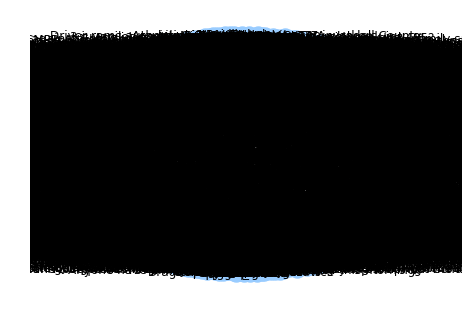

In [311]:
#trial graph

%matplotlib inline 

dg = nx.DiGraph()

GREEN = "#77DD77"
BLUE = "#99CCFF"

subset_g = subset[['title', 'author']]
tuples = [tuple(x) for x in subset_g.values]

#tuples is list containing followers/follwoing pairs
dg.add_edges_from(tuples, color = 'red')
# print('directed edges:', dg.edges())
nx.draw(dg, node_color=BLUE, with_labels=True)

import warnings
warnings.filterwarnings("ignore")

In [256]:
pd.DataFrame(filter.selftext.unique()).to_csv('nodes_text.csv')

In [259]:
len(df.TIME.unique())

6792

In [265]:
year = pd.DatetimeIndex(df['TIME']).year

In [264]:
month = pd.DatetimeIndex(df['TIME']).month

In [278]:
time["year"] = pd.DataFrame(year)

In [276]:
time["month"] = pd.DataFrame(month)

In [281]:
del time['TIME']

In [284]:
df = pd.concat([df, time], axis=1, join_axes=[df.index])

In [292]:
subset_f1 = df[df.year.isin(['2016'])]

In [298]:
subset_2016_6 = subset_f1[subset_f1.month.isin(['1','2','3','4','5','6'])]

In [299]:
subset_2016_6.to_csv('subset_2016_6.csv')

In [300]:
subset_2016_12 = subset_f1[subset_f1.month.isin(['7','8','9','10','11','12'])]
subset_2016_12.to_csv('subset_2016_12.csv')

In [301]:
subset_f2 = df[df.year.isin(['2017'])]
subset_f2.to_csv('subset_2017_all.csv')

In [309]:
subset_f2

Unnamed: 0  index  archived               author author_cakeday  \
130246      130246      0      True      EatMyPoopiePies            NaN   
130247      130247      1      True  MySuperLongAcctName            NaN   
130248      130248      2      True        FormerFastCat            NaN   
130249      130249      3      True          loreleirain            NaN   
130250      130250      4      True            tanishine            NaN   
130251      130251      5      True               Einolm            NaN   
130252      130252      6      True           garythedog            NaN   
130253      130253      7      True             srice005            NaN   
130597      130597      0      True      EatMyPoopiePies            NaN   
130598      130598      1      True  MySuperLongAcctName            NaN   
130599      130599      2      True        FormerFastCat            NaN   
130600      130600      3      True          loreleirain            NaN   
130601      130601      4      True            tanishine            NaN   
130602      130602      5      True               Einolm            NaN   
130603      130603      6      True           garythedog            NaN   
130604      130604      7      True             srice005            NaN   
130943      130943      0      True      EatMyPoopiePies            NaN   
130944      130944      1      True  MySuperLongAcctName            NaN   
130945      130945      2      True        FormerFastCat            NaN   
130946      130946      3      True          loreleirain            NaN   
130947      130947      4      True            tanishine            NaN   
130948      130948      5      True               Einolm            NaN   
130949      130949      6      True           garythedog            NaN   
130950      130950      7      True             srice005            NaN   
131282      131282      0      True      EatMyPoopiePies            NaN   
131283      131283      1      True  MySuperLongAcctName            NaN   
131284      131284      2      True        FormerFastCat            NaN   
131285      131285      3      True          loreleirain            NaN   
131286      131286      4      True            tanishine            NaN   
131287      131287      5      True               Einolm            NaN   
...            ...    ...       ...                  ...            ...   
242546      242546      7     False               dmh123            NaN   
242547      242547      8     False             AlliFitz            NaN   
242548      242548      9     False             zverkalt            NaN   
242549      242549     10     False             289ACode            NaN   
242550      242550     11     False             slow_one            NaN   
242551      242551     12     False             bigpoopa            NaN   
242552      242552     13     False      Deray4President            NaN   
242553      242553     14     False           Canesfan75            NaN   
242554      242554     15     False            Baelzabub            NaN   
242555      242555     16     False         CardMechanic            NaN   
242556      242556     17     False              kimrari            NaN   
242557      242557     18     False             AlliFitz            NaN   
242558      242558      0     False               Connir            NaN   
242559      242559      1     False              tboom29            NaN   
242560      242560      2     False        JeffJacksonNC            NaN   
242561      242561      3     False             Duckpoke            NaN   
242562      242562      4     False      plutoniumwhisky            NaN   
242563      242563      5     False           edgar3981C            NaN   
242564      242564      6     False          Kaosuonline            NaN   
242565      242565      7     False               dmh123            NaN   
242566      242566      8     False             AlliFitz            NaN   
242567      242567      9     Fal

In [306]:
subset = df[['title', 'author']]

In [310]:
subset = subset_f2[['title', 'author']]
subset.to_csv('subset_rel_titles.csv')

In [321]:
#sample

from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], ['this', 'is', 'the', 'second', 'sentence'], ['yet', 'another', 'sentence'], ['one', 'more', 'sentence'], ['and', 'the', 'final', 'sentence']]

In [339]:
model = Word2Vec(sentences, min_count=1)

In [340]:
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [335]:
words = model.wv.vocab

In [336]:
print(words)

{'this': <gensim.models.keyedvectors.Vocab object at 0x15f61fcf8>, 'is': <gensim.models.keyedvectors.Vocab object at 0x15f61f080>, 'the': <gensim.models.keyedvectors.Vocab object at 0x15f61f6a0>, 'first': <gensim.models.keyedvectors.Vocab object at 0x15f61f0f0>, 'sentence': <gensim.models.keyedvectors.Vocab object at 0x15f61f748>, 'for': <gensim.models.keyedvectors.Vocab object at 0x15f61f390>, 'word2vec': <gensim.models.keyedvectors.Vocab object at 0x15f61f9b0>, 'second': <gensim.models.keyedvectors.Vocab object at 0x15f61f0b8>, 'yet': <gensim.models.keyedvectors.Vocab object at 0x15f61fa58>, 'another': <gensim.models.keyedvectors.Vocab object at 0x15f61f668>, 'one': <gensim.models.keyedvectors.Vocab object at 0x15f61fa90>, 'more': <gensim.models.keyedvectors.Vocab object at 0x15f61f630>, 'and': <gensim.models.keyedvectors.Vocab object at 0x15f61f128>, 'final': <gensim.models.keyedvectors.Vocab object at 0x15f61f3c8>}


In [342]:
 model = Word2Vec(sentences)

In [351]:
sentences

[['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]

In [355]:
#samples for reference

model = gensim.models.Word2Vec.load('brown_model')
#words most similar to mother
print(model.most_similar('mother'))
#find the odd one out
print(model.doesnt_match("breakfast cereal dinner lunch".split()))
print(model.doesnt_match("cat dog table".split()))
#vector representation of word human
print(model['human'])

[('father', 0.9754272103309631), ('husband', 0.9613887071609497), ('wife', 0.9511275291442871), ('son', 0.9297999143600464), ('voice', 0.9235813617706299), ('friend', 0.9177204370498657), ('boy', 0.9150866866111755), ('bride', 0.8966772556304932), ('smile', 0.8955989480018616), ('associates', 0.8946769833564758)]
cereal
cat
[  1.13804424e+00   3.24183196e-01   5.62487304e-01  -9.15597141e-01
  -1.85258746e-01   8.00950974e-02  -4.40403223e-01   6.13757491e-01
   1.02499437e+00  -8.19607317e-01  -6.02365434e-01  -5.45742571e-01
   3.06190223e-01   4.40112472e-01   2.54078418e-01   2.17695162e-01
  -5.79381406e-01  -3.46675128e-01  -8.39248076e-02   6.04961157e-01
   1.99906365e-03   3.45560312e-01   4.65134770e-01   5.53112924e-01
   4.33980703e-01  -8.23736668e-01  -6.09762371e-01  -1.49819779e+00
  -1.50769264e-01  -7.28430972e-02   1.50094375e-01   9.75460291e-01
  -1.07202256e+00  -8.73083055e-01   7.16032624e-01   5.41065216e-01
   3.28320786e-02   9.74482536e-01  -2.99450215e-02  

In [356]:
X = model[model.wv.vocab]

In [360]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

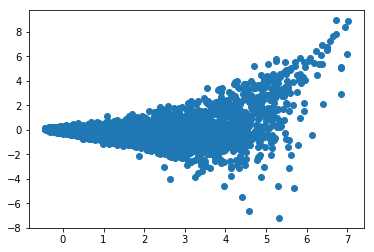

In [363]:
from matplotlib import *
pyplot.scatter(result[:, 0], result[:, 1])

In [367]:
model.wv.vocab

{'The': <gensim.models.keyedvectors.Vocab at 0x166f78a20>,
 'Fulton': <gensim.models.keyedvectors.Vocab at 0x166f78278>,
 'County': <gensim.models.keyedvectors.Vocab at 0x166f781d0>,
 'Grand': <gensim.models.keyedvectors.Vocab at 0x166f78ac8>,
 'Jury': <gensim.models.keyedvectors.Vocab at 0x166f78eb8>,
 'said': <gensim.models.keyedvectors.Vocab at 0x166f78c50>,
 'Friday': <gensim.models.keyedvectors.Vocab at 0x16ddee160>,
 'an': <gensim.models.keyedvectors.Vocab at 0x16ddeef60>,
 'investigation': <gensim.models.keyedvectors.Vocab at 0x16ddee4e0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x16ddee2b0>,
 "Atlanta's": <gensim.models.keyedvectors.Vocab at 0x16ddeed30>,
 'recent': <gensim.models.keyedvectors.Vocab at 0x16ddee080>,
 'primary': <gensim.models.keyedvectors.Vocab at 0x16ddee978>,
 'election': <gensim.models.keyedvectors.Vocab at 0x16ddee748>,
 'produced': <gensim.models.keyedvectors.Vocab at 0x16ddeeeb8>,
 '``': <gensim.models.keyedvectors.Vocab at 0x16ddeec88>,
 'no': <gensi

In [1]:
#rest of the data cleaning was performed in MS Excel

In [ ]:
#file saved as df_csv.csv